In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv("new_train.csv")
test = pd.read_csv("new_test.csv")

In [3]:
train

,Unnamed: 0,bidder_id,payment_account,address,outcome,auction,merchandise,device,time,country,...,max_url_per_auction,min_url_per_auction,std_url_per_auction,total_no_of_participated_auctions,no_of_auction_exceeds_threshold,percentage_of_auctions_above_threshold,total_no_of_bidded_category,no_of_merchandise_exceeds_threshold,percentage_of_merchandise_above_threshold,on_url_that_has_a_bot_mean
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,18.0,1.0,14.0,24.0,6.0,...,1.0,1.0,0.000000,18.0,0.0,0.000000,1.0,0.0,0.0,1.000000
1,1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,1.0,1.0,2.0,3.0,1.0,...,2.0,2.0,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.500000
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,1.0,2.0,4.0,1.0,...,1.0,1.0,0.000000,4.0,0.0,0.000000,1.0,0.0,0.0,0.500000
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,1.000000
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,23.0,1.0,53.0,155.0,2.0,...,21.0,1.0,5.644263,23.0,1.0,0.043478,1.0,0.0,0.0,0.010989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,25.0,1.0,4.0,33.0,4.0,...,1.0,1.0,0.000000,25.0,1.0,0.040000,1.0,0.0,0.0,0.500000
2009,2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.000000
2010,2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.000000
2011,2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.000000,1.0,0.0,0.000000,1.0,0.0,0.0,0.000000


In [4]:
train.drop(train.filter(regex="Unname"),axis=1, inplace=True)
test.drop(test.filter(regex="Unname"),axis=1, inplace=True)

In [5]:
X = train.drop(columns=['bidder_id', 'payment_account', 'address', 'outcome','merchandise']) 
y = train['outcome']
X_test = test.drop(columns=['bidder_id', 'payment_account', 'address', 'merchandise'])

In [40]:
# X.columns

In [6]:
scaler = StandardScaler()
# scaled_features = data.copy()
col_names = ['auction', 'device', 'time', 'country', 'ip', 'url', 'num_bids',
       'num_first_bids', 'num_last_bids', 'time_to_bid', 'inst_resp',
       'perc_inst_resp', 'num_bids_per_auction',
       'num_bids_per_device', 'num_bids_per_country', 'num_bids_per_ip',
       'on_ip_that_has_a_bot_mean', 'ip_entropy', 'url_entropy',
       'mean_country_per_auction', 'max_country_per_auction',
       'min_country_per_auction', 'std_country_per_auction',
       'mean_devices_per_auction', 'max_devices_per_auction',
       'min_devices_per_auction', 'std_devices_per_auction',
       'mean_ip_per_auction', 'max_ip_per_auction', 'min_ip_per_auction',
       'std_ip_per_auction', 'mean_url_per_auction', 'max_url_per_auction',
       'min_url_per_auction', 'std_url_per_auction',
       'total_no_of_participated_auctions', 'no_of_auction_exceeds_threshold',
       'percentage_of_auctions_above_threshold', 'total_no_of_bidded_category',
       'no_of_merchandise_exceeds_threshold',
       'percentage_of_merchandise_above_threshold',
       'on_url_that_has_a_bot_mean']
features = X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[col_names] = features

In [41]:
# scaler = StandardScaler()
features = X_test[col_names]
scaler_test = StandardScaler().fit(features.values)
features = scaler_test.transform(features.values)
X_test[col_names] = features

In [37]:
# trying selectkbest
selector = SelectKBest(mutual_info_regression, k = 20)
selector.fit(X,y)
selectkbest_support = selector.get_support()

In [27]:
# trying rfe
rfe_random_forest = RFE(estimator=RandomForestClassifier(), n_features_to_select = 20, step = 1)
rfe_random_forest.fit(X,y)
rfe_random_forest_support = rfe_random_forest.get_support()

rfe_xgb = RFE(estimator=XGBClassifier(), n_features_to_select = 20, step = 1)
rfe_xgb.fit(X,y)
rfe_xgb_support = rfe_xgb.get_support()

rfe_gb = RFE(estimator=GradientBoostingClassifier(), n_features_to_select = 20, step = 1)
rfe_gb.fit(X,y)
rfe_gb_support = rfe_gb.get_support()

rfe_logistic = RFE(estimator=LogisticRegression(), n_features_to_select = 20, step = 1)
rfe_logistic.fit(X,y)
rfe_logistic_support = rfe_logistic.get_support()

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [34]:
# trying selectfrommodel
sfm_random_forest = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=20)
sfm_random_forest.fit(X,y)
sfm_random_forest_support = sfm_random_forest.get_support()

sfm_xgb = SelectFromModel(XGBClassifier(), max_features=20)
sfm_xgb.fit(X,y)
sfm_xgb_support = sfm_xgb.get_support()

sfm_gb = SelectFromModel(GradientBoostingClassifier(n_estimators=100), max_features=20)
sfm_gb.fit(X,y)
sfm_gb_support = sfm_gb.get_support()

# sfm_logistic = SelectFromModel(LogisticRegression(), max_features=20)
# sfm_logistic.fit(X,y)
# sfm_logistic_support = sfm_logistic.get_support()

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
# https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
feature_selection_df = pd.DataFrame({'Feature':X.columns, 'SelectKBest':selectkbest_support, 
                                     'RFE Random Forest':rfe_random_forest_support, 
                                     'RFE XGB':rfe_xgb_support, 'RFE GB':rfe_gb_support,
                                     'RFE Logistic Regression':rfe_logistic_support, 
                                     'SFM Random Forest':sfm_random_forest_support, 'SFM XGB':sfm_xgb_support,
                                     'SFM GB':sfm_gb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
# feature_selection_df.head(num_feats)
feature_selection_df

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,SelectKBest,RFE Random Forest,RFE XGB,RFE GB,RFE Logistic Regression,SFM Random Forest,SFM XGB,SFM GB,Total
1,num_bids_per_device,True,True,True,True,True,True,True,True,8
2,num_bids_per_country,True,True,True,True,True,True,True,True,8
3,num_bids,True,True,True,True,True,True,True,True,8
4,std_url_per_auction,False,True,True,True,True,True,True,True,7
5,std_devices_per_auction,True,True,True,True,True,True,True,False,7
6,num_bids_per_auction,True,True,True,True,False,True,True,True,7
7,mean_url_per_auction,True,True,True,True,False,True,True,True,7
8,mean_ip_per_auction,True,True,True,True,False,True,True,True,7
9,mean_devices_per_auction,True,True,True,True,True,True,True,False,7
10,device,False,True,True,True,True,True,True,True,7


In [47]:
selected_features = feature_selection_df.iloc[0:20,0]
X_train = X[selected_features]
X_test = X_test[selected_features]

### Brennan's model

In [76]:
def training_model(model, num_splits, X, y):
    skfolds = StratifiedKFold(n_splits=num_splits)
    for train_index, test_index in skfolds.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]        
    
        sm = SMOTE()
        X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

        
        model = model
        model.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = model.predict(X_test)
        
        print(f'Accuracy: {model.score(X_test, y_test)}')
        print(f'f-score: {f1_score(y_test, y_pred)}')

In [58]:
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier
model = CatBoostClassifier(learning_rate=0.1, max_depth=3,random_state = 10)
num_splits = 10
training_model(model, num_splits, X_train, y)


0:	learn: 0.6166848	total: 2.48ms	remaining: 2.48s
1:	learn: 0.5578183	total: 4.53ms	remaining: 2.26s
2:	learn: 0.5120528	total: 6.73ms	remaining: 2.23s
3:	learn: 0.4704527	total: 9.6ms	remaining: 2.39s
4:	learn: 0.4427307	total: 11.7ms	remaining: 2.33s
5:	learn: 0.4131662	total: 14ms	remaining: 2.32s
6:	learn: 0.3945390	total: 16.3ms	remaining: 2.32s
7:	learn: 0.3799130	total: 18.1ms	remaining: 2.25s
8:	learn: 0.3679508	total: 20.5ms	remaining: 2.25s
9:	learn: 0.3518778	total: 22.5ms	remaining: 2.23s
10:	learn: 0.3434202	total: 24.6ms	remaining: 2.21s
11:	learn: 0.3349905	total: 27.1ms	remaining: 2.23s
12:	learn: 0.3242975	total: 29.7ms	remaining: 2.25s
13:	learn: 0.3180470	total: 31.7ms	remaining: 2.23s
14:	learn: 0.3126348	total: 34.1ms	remaining: 2.24s
15:	learn: 0.3073012	total: 36.5ms	remaining: 2.25s
16:	learn: 0.3038718	total: 39.2ms	remaining: 2.27s
17:	learn: 0.2993971	total: 42.6ms	remaining: 2.32s
18:	learn: 0.2965641	total: 44.8ms	remaining: 2.31s
19:	learn: 0.2922787	tota

169:	learn: 0.1063955	total: 357ms	remaining: 1.74s
170:	learn: 0.1060428	total: 359ms	remaining: 1.74s
171:	learn: 0.1057293	total: 362ms	remaining: 1.74s
172:	learn: 0.1053077	total: 365ms	remaining: 1.74s
173:	learn: 0.1050393	total: 367ms	remaining: 1.74s
174:	learn: 0.1045882	total: 369ms	remaining: 1.74s
175:	learn: 0.1039540	total: 372ms	remaining: 1.74s
176:	learn: 0.1031216	total: 374ms	remaining: 1.74s
177:	learn: 0.1027056	total: 376ms	remaining: 1.74s
178:	learn: 0.1021592	total: 380ms	remaining: 1.74s
179:	learn: 0.1019236	total: 383ms	remaining: 1.74s
180:	learn: 0.1014197	total: 385ms	remaining: 1.74s
181:	learn: 0.1006252	total: 386ms	remaining: 1.74s
182:	learn: 0.1002214	total: 389ms	remaining: 1.74s
183:	learn: 0.1000129	total: 391ms	remaining: 1.73s
184:	learn: 0.0995059	total: 393ms	remaining: 1.73s
185:	learn: 0.0988892	total: 395ms	remaining: 1.73s
186:	learn: 0.0984721	total: 397ms	remaining: 1.73s
187:	learn: 0.0982020	total: 399ms	remaining: 1.72s
188:	learn: 

341:	learn: 0.0530758	total: 715ms	remaining: 1.38s
342:	learn: 0.0528531	total: 718ms	remaining: 1.37s
343:	learn: 0.0526248	total: 720ms	remaining: 1.37s
344:	learn: 0.0523410	total: 722ms	remaining: 1.37s
345:	learn: 0.0521196	total: 724ms	remaining: 1.37s
346:	learn: 0.0519715	total: 726ms	remaining: 1.37s
347:	learn: 0.0516639	total: 728ms	remaining: 1.36s
348:	learn: 0.0515448	total: 730ms	remaining: 1.36s
349:	learn: 0.0513181	total: 733ms	remaining: 1.36s
350:	learn: 0.0511428	total: 735ms	remaining: 1.36s
351:	learn: 0.0510782	total: 737ms	remaining: 1.36s
352:	learn: 0.0508668	total: 739ms	remaining: 1.35s
353:	learn: 0.0506823	total: 741ms	remaining: 1.35s
354:	learn: 0.0504373	total: 744ms	remaining: 1.35s
355:	learn: 0.0502779	total: 745ms	remaining: 1.35s
356:	learn: 0.0501242	total: 747ms	remaining: 1.34s
357:	learn: 0.0501043	total: 749ms	remaining: 1.34s
358:	learn: 0.0500509	total: 751ms	remaining: 1.34s
359:	learn: 0.0499104	total: 753ms	remaining: 1.34s
360:	learn: 

511:	learn: 0.0318706	total: 1.07s	remaining: 1.02s
512:	learn: 0.0317456	total: 1.07s	remaining: 1.02s
513:	learn: 0.0317101	total: 1.07s	remaining: 1.02s
514:	learn: 0.0316195	total: 1.08s	remaining: 1.01s
515:	learn: 0.0315543	total: 1.08s	remaining: 1.01s
516:	learn: 0.0314638	total: 1.08s	remaining: 1.01s
517:	learn: 0.0314135	total: 1.08s	remaining: 1.01s
518:	learn: 0.0313316	total: 1.09s	remaining: 1.01s
519:	learn: 0.0312404	total: 1.09s	remaining: 1.01s
520:	learn: 0.0311549	total: 1.09s	remaining: 1s
521:	learn: 0.0310176	total: 1.09s	remaining: 1s
522:	learn: 0.0309664	total: 1.1s	remaining: 1s
523:	learn: 0.0309182	total: 1.1s	remaining: 999ms
524:	learn: 0.0308575	total: 1.1s	remaining: 997ms
525:	learn: 0.0307325	total: 1.1s	remaining: 995ms
526:	learn: 0.0306370	total: 1.11s	remaining: 993ms
527:	learn: 0.0306189	total: 1.11s	remaining: 991ms
528:	learn: 0.0305438	total: 1.11s	remaining: 989ms
529:	learn: 0.0304258	total: 1.11s	remaining: 987ms
530:	learn: 0.0303840	tot

759:	learn: 0.0187756	total: 1.6s	remaining: 507ms
760:	learn: 0.0187538	total: 1.61s	remaining: 505ms
761:	learn: 0.0187358	total: 1.61s	remaining: 503ms
762:	learn: 0.0187049	total: 1.61s	remaining: 501ms
763:	learn: 0.0187049	total: 1.61s	remaining: 498ms
764:	learn: 0.0186305	total: 1.61s	remaining: 496ms
765:	learn: 0.0186032	total: 1.62s	remaining: 494ms
766:	learn: 0.0185892	total: 1.62s	remaining: 492ms
767:	learn: 0.0185632	total: 1.62s	remaining: 490ms
768:	learn: 0.0185285	total: 1.62s	remaining: 488ms
769:	learn: 0.0184697	total: 1.63s	remaining: 486ms
770:	learn: 0.0184498	total: 1.63s	remaining: 484ms
771:	learn: 0.0184339	total: 1.63s	remaining: 482ms
772:	learn: 0.0183896	total: 1.63s	remaining: 480ms
773:	learn: 0.0183780	total: 1.64s	remaining: 478ms
774:	learn: 0.0183245	total: 1.64s	remaining: 476ms
775:	learn: 0.0183024	total: 1.64s	remaining: 473ms
776:	learn: 0.0182670	total: 1.64s	remaining: 471ms
777:	learn: 0.0182669	total: 1.64s	remaining: 469ms
778:	learn: 0

942:	learn: 0.0143509	total: 1.96s	remaining: 119ms
943:	learn: 0.0143466	total: 1.96s	remaining: 116ms
944:	learn: 0.0143401	total: 1.97s	remaining: 114ms
945:	learn: 0.0143349	total: 1.97s	remaining: 112ms
946:	learn: 0.0143012	total: 1.97s	remaining: 110ms
947:	learn: 0.0142851	total: 1.97s	remaining: 108ms
948:	learn: 0.0142801	total: 1.97s	remaining: 106ms
949:	learn: 0.0142719	total: 1.98s	remaining: 104ms
950:	learn: 0.0142655	total: 1.98s	remaining: 102ms
951:	learn: 0.0142602	total: 1.98s	remaining: 99.8ms
952:	learn: 0.0142602	total: 1.98s	remaining: 97.7ms
953:	learn: 0.0141998	total: 1.98s	remaining: 95.6ms
954:	learn: 0.0141919	total: 1.98s	remaining: 93.5ms
955:	learn: 0.0141741	total: 1.99s	remaining: 91.4ms
956:	learn: 0.0141651	total: 1.99s	remaining: 89.3ms
957:	learn: 0.0141650	total: 1.99s	remaining: 87.2ms
958:	learn: 0.0141650	total: 1.99s	remaining: 85.2ms
959:	learn: 0.0141098	total: 1.99s	remaining: 83.1ms
960:	learn: 0.0141097	total: 2s	remaining: 81ms
961:	le

161:	learn: 0.1109557	total: 375ms	remaining: 1.94s
162:	learn: 0.1103023	total: 377ms	remaining: 1.94s
163:	learn: 0.1093640	total: 379ms	remaining: 1.93s
164:	learn: 0.1086734	total: 382ms	remaining: 1.93s
165:	learn: 0.1080639	total: 384ms	remaining: 1.93s
166:	learn: 0.1078310	total: 386ms	remaining: 1.92s
167:	learn: 0.1071940	total: 388ms	remaining: 1.92s
168:	learn: 0.1064862	total: 391ms	remaining: 1.92s
169:	learn: 0.1060284	total: 393ms	remaining: 1.92s
170:	learn: 0.1056813	total: 395ms	remaining: 1.91s
171:	learn: 0.1051593	total: 397ms	remaining: 1.91s
172:	learn: 0.1048921	total: 399ms	remaining: 1.91s
173:	learn: 0.1044721	total: 401ms	remaining: 1.9s
174:	learn: 0.1036486	total: 404ms	remaining: 1.9s
175:	learn: 0.1034088	total: 405ms	remaining: 1.9s
176:	learn: 0.1030035	total: 408ms	remaining: 1.9s
177:	learn: 0.1024218	total: 410ms	remaining: 1.89s
178:	learn: 0.1018421	total: 412ms	remaining: 1.89s
179:	learn: 0.1010181	total: 414ms	remaining: 1.89s
180:	learn: 0.10

383:	learn: 0.0421188	total: 894ms	remaining: 1.43s
384:	learn: 0.0419125	total: 897ms	remaining: 1.43s
385:	learn: 0.0417978	total: 899ms	remaining: 1.43s
386:	learn: 0.0417330	total: 902ms	remaining: 1.43s
387:	learn: 0.0415110	total: 904ms	remaining: 1.43s
388:	learn: 0.0414375	total: 906ms	remaining: 1.42s
389:	learn: 0.0412952	total: 908ms	remaining: 1.42s
390:	learn: 0.0411417	total: 910ms	remaining: 1.42s
391:	learn: 0.0410854	total: 912ms	remaining: 1.42s
392:	learn: 0.0408903	total: 915ms	remaining: 1.41s
393:	learn: 0.0406996	total: 918ms	remaining: 1.41s
394:	learn: 0.0405185	total: 920ms	remaining: 1.41s
395:	learn: 0.0403864	total: 922ms	remaining: 1.41s
396:	learn: 0.0402169	total: 924ms	remaining: 1.4s
397:	learn: 0.0400311	total: 926ms	remaining: 1.4s
398:	learn: 0.0399530	total: 929ms	remaining: 1.4s
399:	learn: 0.0398633	total: 931ms	remaining: 1.4s
400:	learn: 0.0397516	total: 933ms	remaining: 1.39s
401:	learn: 0.0394989	total: 936ms	remaining: 1.39s
402:	learn: 0.03

542:	learn: 0.0256579	total: 1.25s	remaining: 1.05s
543:	learn: 0.0256407	total: 1.25s	remaining: 1.05s
544:	learn: 0.0255776	total: 1.25s	remaining: 1.05s
545:	learn: 0.0255415	total: 1.26s	remaining: 1.04s
546:	learn: 0.0254394	total: 1.26s	remaining: 1.04s
547:	learn: 0.0253391	total: 1.26s	remaining: 1.04s
548:	learn: 0.0252248	total: 1.26s	remaining: 1.04s
549:	learn: 0.0251906	total: 1.27s	remaining: 1.03s
550:	learn: 0.0251604	total: 1.27s	remaining: 1.03s
551:	learn: 0.0250532	total: 1.27s	remaining: 1.03s
552:	learn: 0.0250238	total: 1.27s	remaining: 1.03s
553:	learn: 0.0249897	total: 1.27s	remaining: 1.02s
554:	learn: 0.0249748	total: 1.28s	remaining: 1.02s
555:	learn: 0.0249337	total: 1.28s	remaining: 1.02s
556:	learn: 0.0248918	total: 1.28s	remaining: 1.02s
557:	learn: 0.0248422	total: 1.28s	remaining: 1.02s
558:	learn: 0.0247992	total: 1.28s	remaining: 1.01s
559:	learn: 0.0247308	total: 1.29s	remaining: 1.01s
560:	learn: 0.0246761	total: 1.29s	remaining: 1.01s
561:	learn: 

777:	learn: 0.0151749	total: 1.78s	remaining: 508ms
778:	learn: 0.0151725	total: 1.78s	remaining: 506ms
779:	learn: 0.0151585	total: 1.78s	remaining: 504ms
780:	learn: 0.0150830	total: 1.79s	remaining: 501ms
781:	learn: 0.0150705	total: 1.79s	remaining: 499ms
782:	learn: 0.0150437	total: 1.79s	remaining: 497ms
783:	learn: 0.0150437	total: 1.79s	remaining: 494ms
784:	learn: 0.0150283	total: 1.79s	remaining: 492ms
785:	learn: 0.0149875	total: 1.8s	remaining: 489ms
786:	learn: 0.0149588	total: 1.8s	remaining: 487ms
787:	learn: 0.0149555	total: 1.8s	remaining: 485ms
788:	learn: 0.0149062	total: 1.8s	remaining: 483ms
789:	learn: 0.0148788	total: 1.81s	remaining: 480ms
790:	learn: 0.0148588	total: 1.81s	remaining: 478ms
791:	learn: 0.0148527	total: 1.81s	remaining: 475ms
792:	learn: 0.0148076	total: 1.81s	remaining: 473ms
793:	learn: 0.0148076	total: 1.81s	remaining: 471ms
794:	learn: 0.0147735	total: 1.82s	remaining: 469ms
795:	learn: 0.0147539	total: 1.82s	remaining: 466ms
796:	learn: 0.01

946:	learn: 0.0115454	total: 2.13s	remaining: 119ms
947:	learn: 0.0115453	total: 2.13s	remaining: 117ms
948:	learn: 0.0115330	total: 2.13s	remaining: 115ms
949:	learn: 0.0115148	total: 2.14s	remaining: 113ms
950:	learn: 0.0114760	total: 2.14s	remaining: 110ms
951:	learn: 0.0114458	total: 2.14s	remaining: 108ms
952:	learn: 0.0114182	total: 2.14s	remaining: 106ms
953:	learn: 0.0114043	total: 2.15s	remaining: 104ms
954:	learn: 0.0114043	total: 2.15s	remaining: 101ms
955:	learn: 0.0114042	total: 2.15s	remaining: 99ms
956:	learn: 0.0114039	total: 2.15s	remaining: 96.7ms
957:	learn: 0.0113971	total: 2.15s	remaining: 94.5ms
958:	learn: 0.0113840	total: 2.16s	remaining: 92.2ms
959:	learn: 0.0113680	total: 2.16s	remaining: 89.9ms
960:	learn: 0.0113435	total: 2.16s	remaining: 87.7ms
961:	learn: 0.0113282	total: 2.16s	remaining: 85.4ms
962:	learn: 0.0113152	total: 2.16s	remaining: 83.2ms
963:	learn: 0.0113104	total: 2.17s	remaining: 80.9ms
964:	learn: 0.0113028	total: 2.17s	remaining: 78.6ms
965:

106:	learn: 0.1508600	total: 220ms	remaining: 1.84s
107:	learn: 0.1501310	total: 223ms	remaining: 1.84s
108:	learn: 0.1489910	total: 225ms	remaining: 1.84s
109:	learn: 0.1483979	total: 228ms	remaining: 1.84s
110:	learn: 0.1475550	total: 230ms	remaining: 1.84s
111:	learn: 0.1463242	total: 232ms	remaining: 1.84s
112:	learn: 0.1453339	total: 234ms	remaining: 1.84s
113:	learn: 0.1449237	total: 236ms	remaining: 1.83s
114:	learn: 0.1439314	total: 239ms	remaining: 1.84s
115:	learn: 0.1429844	total: 241ms	remaining: 1.83s
116:	learn: 0.1421436	total: 243ms	remaining: 1.84s
117:	learn: 0.1416405	total: 246ms	remaining: 1.83s
118:	learn: 0.1403083	total: 247ms	remaining: 1.83s
119:	learn: 0.1389547	total: 249ms	remaining: 1.83s
120:	learn: 0.1384673	total: 252ms	remaining: 1.83s
121:	learn: 0.1377487	total: 254ms	remaining: 1.82s
122:	learn: 0.1363808	total: 256ms	remaining: 1.82s
123:	learn: 0.1355663	total: 258ms	remaining: 1.82s
124:	learn: 0.1341934	total: 260ms	remaining: 1.82s
125:	learn: 

282:	learn: 0.0638016	total: 580ms	remaining: 1.47s
283:	learn: 0.0635555	total: 582ms	remaining: 1.47s
284:	learn: 0.0632445	total: 585ms	remaining: 1.47s
285:	learn: 0.0630563	total: 587ms	remaining: 1.46s
286:	learn: 0.0628483	total: 589ms	remaining: 1.46s
287:	learn: 0.0626160	total: 591ms	remaining: 1.46s
288:	learn: 0.0619351	total: 593ms	remaining: 1.46s
289:	learn: 0.0616826	total: 595ms	remaining: 1.46s
290:	learn: 0.0615977	total: 597ms	remaining: 1.45s
291:	learn: 0.0613460	total: 599ms	remaining: 1.45s
292:	learn: 0.0611830	total: 601ms	remaining: 1.45s
293:	learn: 0.0611088	total: 603ms	remaining: 1.45s
294:	learn: 0.0608900	total: 606ms	remaining: 1.45s
295:	learn: 0.0606496	total: 608ms	remaining: 1.45s
296:	learn: 0.0605267	total: 610ms	remaining: 1.44s
297:	learn: 0.0603220	total: 612ms	remaining: 1.44s
298:	learn: 0.0600469	total: 614ms	remaining: 1.44s
299:	learn: 0.0598285	total: 616ms	remaining: 1.44s
300:	learn: 0.0596757	total: 618ms	remaining: 1.44s
301:	learn: 

444:	learn: 0.0370713	total: 932ms	remaining: 1.16s
445:	learn: 0.0369405	total: 934ms	remaining: 1.16s
446:	learn: 0.0368887	total: 936ms	remaining: 1.16s
447:	learn: 0.0367747	total: 938ms	remaining: 1.16s
448:	learn: 0.0367075	total: 940ms	remaining: 1.15s
449:	learn: 0.0366343	total: 942ms	remaining: 1.15s
450:	learn: 0.0364097	total: 945ms	remaining: 1.15s
451:	learn: 0.0363153	total: 948ms	remaining: 1.15s
452:	learn: 0.0362914	total: 950ms	remaining: 1.15s
453:	learn: 0.0360631	total: 952ms	remaining: 1.15s
454:	learn: 0.0359724	total: 955ms	remaining: 1.14s
455:	learn: 0.0359202	total: 957ms	remaining: 1.14s
456:	learn: 0.0358790	total: 959ms	remaining: 1.14s
457:	learn: 0.0358072	total: 962ms	remaining: 1.14s
458:	learn: 0.0356529	total: 964ms	remaining: 1.14s
459:	learn: 0.0355549	total: 966ms	remaining: 1.13s
460:	learn: 0.0354752	total: 969ms	remaining: 1.13s
461:	learn: 0.0354303	total: 970ms	remaining: 1.13s
462:	learn: 0.0352944	total: 972ms	remaining: 1.13s
463:	learn: 

619:	learn: 0.0236014	total: 1.29s	remaining: 790ms
620:	learn: 0.0235133	total: 1.29s	remaining: 788ms
621:	learn: 0.0234874	total: 1.29s	remaining: 786ms
622:	learn: 0.0234495	total: 1.29s	remaining: 784ms
623:	learn: 0.0233889	total: 1.3s	remaining: 782ms
624:	learn: 0.0233503	total: 1.3s	remaining: 780ms
625:	learn: 0.0233340	total: 1.3s	remaining: 778ms
626:	learn: 0.0232849	total: 1.3s	remaining: 776ms
627:	learn: 0.0232447	total: 1.3s	remaining: 773ms
628:	learn: 0.0231996	total: 1.31s	remaining: 771ms
629:	learn: 0.0231198	total: 1.31s	remaining: 769ms
630:	learn: 0.0230761	total: 1.31s	remaining: 767ms
631:	learn: 0.0230494	total: 1.31s	remaining: 765ms
632:	learn: 0.0230034	total: 1.31s	remaining: 763ms
633:	learn: 0.0229119	total: 1.32s	remaining: 761ms
634:	learn: 0.0228314	total: 1.32s	remaining: 759ms
635:	learn: 0.0227939	total: 1.32s	remaining: 756ms
636:	learn: 0.0227756	total: 1.32s	remaining: 754ms
637:	learn: 0.0227662	total: 1.32s	remaining: 752ms
638:	learn: 0.022

800:	learn: 0.0165625	total: 1.65s	remaining: 409ms
801:	learn: 0.0165489	total: 1.65s	remaining: 407ms
802:	learn: 0.0165488	total: 1.65s	remaining: 405ms
803:	learn: 0.0165018	total: 1.65s	remaining: 403ms
804:	learn: 0.0164891	total: 1.66s	remaining: 401ms
805:	learn: 0.0164701	total: 1.66s	remaining: 399ms
806:	learn: 0.0164506	total: 1.66s	remaining: 397ms
807:	learn: 0.0163842	total: 1.66s	remaining: 395ms
808:	learn: 0.0163475	total: 1.67s	remaining: 393ms
809:	learn: 0.0163474	total: 1.67s	remaining: 391ms
810:	learn: 0.0163474	total: 1.67s	remaining: 389ms
811:	learn: 0.0163474	total: 1.67s	remaining: 387ms
812:	learn: 0.0163425	total: 1.67s	remaining: 385ms
813:	learn: 0.0163425	total: 1.67s	remaining: 383ms
814:	learn: 0.0163425	total: 1.68s	remaining: 381ms
815:	learn: 0.0163393	total: 1.68s	remaining: 379ms
816:	learn: 0.0163392	total: 1.68s	remaining: 376ms
817:	learn: 0.0163388	total: 1.68s	remaining: 374ms
818:	learn: 0.0163388	total: 1.68s	remaining: 372ms
819:	learn: 

961:	learn: 0.0135720	total: 1.99s	remaining: 78.7ms
962:	learn: 0.0135599	total: 2s	remaining: 76.7ms
963:	learn: 0.0135467	total: 2s	remaining: 74.7ms
964:	learn: 0.0135315	total: 2s	remaining: 72.6ms
965:	learn: 0.0135314	total: 2s	remaining: 70.5ms
966:	learn: 0.0135140	total: 2s	remaining: 68.4ms
967:	learn: 0.0134927	total: 2.01s	remaining: 66.4ms
968:	learn: 0.0134779	total: 2.01s	remaining: 64.3ms
969:	learn: 0.0134411	total: 2.01s	remaining: 62.2ms
970:	learn: 0.0134409	total: 2.01s	remaining: 60.2ms
971:	learn: 0.0134376	total: 2.02s	remaining: 58.1ms
972:	learn: 0.0134375	total: 2.02s	remaining: 56ms
973:	learn: 0.0134375	total: 2.02s	remaining: 53.9ms
974:	learn: 0.0134067	total: 2.02s	remaining: 51.9ms
975:	learn: 0.0133961	total: 2.02s	remaining: 49.8ms
976:	learn: 0.0133793	total: 2.03s	remaining: 47.7ms
977:	learn: 0.0133793	total: 2.03s	remaining: 45.6ms
978:	learn: 0.0133469	total: 2.03s	remaining: 43.6ms
979:	learn: 0.0133329	total: 2.03s	remaining: 41.5ms
980:	learn

204:	learn: 0.0863726	total: 419ms	remaining: 1.62s
205:	learn: 0.0861371	total: 421ms	remaining: 1.62s
206:	learn: 0.0858547	total: 423ms	remaining: 1.62s
207:	learn: 0.0854328	total: 426ms	remaining: 1.62s
208:	learn: 0.0851563	total: 428ms	remaining: 1.62s
209:	learn: 0.0849736	total: 430ms	remaining: 1.62s
210:	learn: 0.0848114	total: 432ms	remaining: 1.62s
211:	learn: 0.0843327	total: 434ms	remaining: 1.61s
212:	learn: 0.0841025	total: 436ms	remaining: 1.61s
213:	learn: 0.0839619	total: 438ms	remaining: 1.61s
214:	learn: 0.0834952	total: 441ms	remaining: 1.61s
215:	learn: 0.0830116	total: 443ms	remaining: 1.61s
216:	learn: 0.0827970	total: 445ms	remaining: 1.61s
217:	learn: 0.0825182	total: 447ms	remaining: 1.6s
218:	learn: 0.0822750	total: 449ms	remaining: 1.6s
219:	learn: 0.0820899	total: 451ms	remaining: 1.6s
220:	learn: 0.0818102	total: 453ms	remaining: 1.6s
221:	learn: 0.0814360	total: 455ms	remaining: 1.59s
222:	learn: 0.0811770	total: 457ms	remaining: 1.59s
223:	learn: 0.08

373:	learn: 0.0469453	total: 771ms	remaining: 1.29s
374:	learn: 0.0468338	total: 773ms	remaining: 1.29s
375:	learn: 0.0467288	total: 775ms	remaining: 1.29s
376:	learn: 0.0466961	total: 777ms	remaining: 1.28s
377:	learn: 0.0464538	total: 779ms	remaining: 1.28s
378:	learn: 0.0462718	total: 782ms	remaining: 1.28s
379:	learn: 0.0462070	total: 785ms	remaining: 1.28s
380:	learn: 0.0461328	total: 787ms	remaining: 1.28s
381:	learn: 0.0460353	total: 789ms	remaining: 1.28s
382:	learn: 0.0458359	total: 792ms	remaining: 1.27s
383:	learn: 0.0457212	total: 794ms	remaining: 1.27s
384:	learn: 0.0453881	total: 796ms	remaining: 1.27s
385:	learn: 0.0453281	total: 797ms	remaining: 1.27s
386:	learn: 0.0451291	total: 799ms	remaining: 1.27s
387:	learn: 0.0450853	total: 801ms	remaining: 1.26s
388:	learn: 0.0450232	total: 804ms	remaining: 1.26s
389:	learn: 0.0448051	total: 806ms	remaining: 1.26s
390:	learn: 0.0446822	total: 808ms	remaining: 1.26s
391:	learn: 0.0444557	total: 809ms	remaining: 1.25s
392:	learn: 

555:	learn: 0.0280231	total: 1.13s	remaining: 902ms
556:	learn: 0.0280042	total: 1.13s	remaining: 900ms
557:	learn: 0.0279221	total: 1.13s	remaining: 897ms
558:	learn: 0.0278925	total: 1.13s	remaining: 895ms
559:	learn: 0.0278106	total: 1.14s	remaining: 894ms
560:	learn: 0.0277194	total: 1.14s	remaining: 891ms
561:	learn: 0.0276152	total: 1.14s	remaining: 890ms
562:	learn: 0.0275373	total: 1.14s	remaining: 888ms
563:	learn: 0.0273805	total: 1.15s	remaining: 886ms
564:	learn: 0.0273273	total: 1.15s	remaining: 884ms
565:	learn: 0.0272493	total: 1.15s	remaining: 882ms
566:	learn: 0.0271439	total: 1.15s	remaining: 880ms
567:	learn: 0.0271148	total: 1.15s	remaining: 878ms
568:	learn: 0.0270484	total: 1.16s	remaining: 876ms
569:	learn: 0.0269672	total: 1.16s	remaining: 874ms
570:	learn: 0.0268487	total: 1.16s	remaining: 872ms
571:	learn: 0.0268041	total: 1.16s	remaining: 870ms
572:	learn: 0.0267390	total: 1.16s	remaining: 868ms
573:	learn: 0.0266967	total: 1.17s	remaining: 866ms
574:	learn: 

723:	learn: 0.0194945	total: 1.48s	remaining: 565ms
724:	learn: 0.0194865	total: 1.48s	remaining: 563ms
725:	learn: 0.0194189	total: 1.49s	remaining: 561ms
726:	learn: 0.0193798	total: 1.49s	remaining: 559ms
727:	learn: 0.0193441	total: 1.49s	remaining: 557ms
728:	learn: 0.0192748	total: 1.49s	remaining: 556ms
729:	learn: 0.0192287	total: 1.5s	remaining: 554ms
730:	learn: 0.0191834	total: 1.5s	remaining: 552ms
731:	learn: 0.0191520	total: 1.5s	remaining: 550ms
732:	learn: 0.0190957	total: 1.5s	remaining: 548ms
733:	learn: 0.0190673	total: 1.5s	remaining: 546ms
734:	learn: 0.0190368	total: 1.51s	remaining: 544ms
735:	learn: 0.0189763	total: 1.51s	remaining: 541ms
736:	learn: 0.0189072	total: 1.51s	remaining: 539ms
737:	learn: 0.0188625	total: 1.51s	remaining: 537ms
738:	learn: 0.0188125	total: 1.51s	remaining: 535ms
739:	learn: 0.0187574	total: 1.52s	remaining: 533ms
740:	learn: 0.0187344	total: 1.52s	remaining: 531ms
741:	learn: 0.0186760	total: 1.52s	remaining: 529ms
742:	learn: 0.018

904:	learn: 0.0142299	total: 1.83s	remaining: 193ms
905:	learn: 0.0141713	total: 1.84s	remaining: 191ms
906:	learn: 0.0141713	total: 1.84s	remaining: 189ms
907:	learn: 0.0141639	total: 1.84s	remaining: 187ms
908:	learn: 0.0141638	total: 1.84s	remaining: 185ms
909:	learn: 0.0141572	total: 1.84s	remaining: 183ms
910:	learn: 0.0141572	total: 1.85s	remaining: 180ms
911:	learn: 0.0141465	total: 1.85s	remaining: 178ms
912:	learn: 0.0141465	total: 1.85s	remaining: 176ms
913:	learn: 0.0141464	total: 1.85s	remaining: 174ms
914:	learn: 0.0141375	total: 1.85s	remaining: 172ms
915:	learn: 0.0141288	total: 1.86s	remaining: 170ms
916:	learn: 0.0141051	total: 1.86s	remaining: 168ms
917:	learn: 0.0140955	total: 1.86s	remaining: 166ms
918:	learn: 0.0140599	total: 1.86s	remaining: 164ms
919:	learn: 0.0140232	total: 1.86s	remaining: 162ms
920:	learn: 0.0139902	total: 1.86s	remaining: 160ms
921:	learn: 0.0139444	total: 1.87s	remaining: 158ms
922:	learn: 0.0139178	total: 1.87s	remaining: 156ms
923:	learn: 

77:	learn: 0.1815141	total: 156ms	remaining: 1.84s
78:	learn: 0.1805402	total: 159ms	remaining: 1.85s
79:	learn: 0.1796085	total: 161ms	remaining: 1.85s
80:	learn: 0.1788244	total: 163ms	remaining: 1.85s
81:	learn: 0.1764289	total: 165ms	remaining: 1.85s
82:	learn: 0.1752144	total: 168ms	remaining: 1.85s
83:	learn: 0.1746364	total: 170ms	remaining: 1.85s
84:	learn: 0.1736660	total: 172ms	remaining: 1.85s
85:	learn: 0.1729307	total: 174ms	remaining: 1.85s
86:	learn: 0.1717343	total: 176ms	remaining: 1.85s
87:	learn: 0.1708583	total: 178ms	remaining: 1.85s
88:	learn: 0.1690686	total: 180ms	remaining: 1.84s
89:	learn: 0.1678800	total: 182ms	remaining: 1.84s
90:	learn: 0.1669403	total: 184ms	remaining: 1.84s
91:	learn: 0.1665127	total: 186ms	remaining: 1.84s
92:	learn: 0.1661607	total: 188ms	remaining: 1.83s
93:	learn: 0.1653856	total: 191ms	remaining: 1.84s
94:	learn: 0.1635276	total: 193ms	remaining: 1.84s
95:	learn: 0.1626918	total: 195ms	remaining: 1.83s
96:	learn: 0.1615074	total: 197

249:	learn: 0.0726243	total: 515ms	remaining: 1.54s
250:	learn: 0.0725153	total: 517ms	remaining: 1.54s
251:	learn: 0.0722141	total: 519ms	remaining: 1.54s
252:	learn: 0.0720317	total: 521ms	remaining: 1.54s
253:	learn: 0.0718877	total: 524ms	remaining: 1.54s
254:	learn: 0.0717873	total: 526ms	remaining: 1.54s
255:	learn: 0.0714594	total: 529ms	remaining: 1.54s
256:	learn: 0.0711964	total: 531ms	remaining: 1.53s
257:	learn: 0.0707699	total: 533ms	remaining: 1.53s
258:	learn: 0.0706453	total: 535ms	remaining: 1.53s
259:	learn: 0.0703529	total: 537ms	remaining: 1.53s
260:	learn: 0.0701419	total: 539ms	remaining: 1.52s
261:	learn: 0.0697787	total: 541ms	remaining: 1.52s
262:	learn: 0.0694644	total: 544ms	remaining: 1.52s
263:	learn: 0.0693500	total: 546ms	remaining: 1.52s
264:	learn: 0.0689307	total: 548ms	remaining: 1.52s
265:	learn: 0.0687745	total: 550ms	remaining: 1.52s
266:	learn: 0.0687005	total: 552ms	remaining: 1.51s
267:	learn: 0.0685417	total: 554ms	remaining: 1.51s
268:	learn: 

424:	learn: 0.0403840	total: 870ms	remaining: 1.18s
425:	learn: 0.0402403	total: 872ms	remaining: 1.18s
426:	learn: 0.0401998	total: 875ms	remaining: 1.17s
427:	learn: 0.0399481	total: 877ms	remaining: 1.17s
428:	learn: 0.0398957	total: 879ms	remaining: 1.17s
429:	learn: 0.0398325	total: 881ms	remaining: 1.17s
430:	learn: 0.0396933	total: 883ms	remaining: 1.17s
431:	learn: 0.0396236	total: 885ms	remaining: 1.16s
432:	learn: 0.0394439	total: 887ms	remaining: 1.16s
433:	learn: 0.0393419	total: 889ms	remaining: 1.16s
434:	learn: 0.0392732	total: 891ms	remaining: 1.16s
435:	learn: 0.0391701	total: 893ms	remaining: 1.16s
436:	learn: 0.0390471	total: 895ms	remaining: 1.15s
437:	learn: 0.0388778	total: 897ms	remaining: 1.15s
438:	learn: 0.0387132	total: 898ms	remaining: 1.15s
439:	learn: 0.0386016	total: 900ms	remaining: 1.15s
440:	learn: 0.0383782	total: 902ms	remaining: 1.14s
441:	learn: 0.0383317	total: 905ms	remaining: 1.14s
442:	learn: 0.0382570	total: 907ms	remaining: 1.14s
443:	learn: 

603:	learn: 0.0255432	total: 1.23s	remaining: 805ms
604:	learn: 0.0255186	total: 1.23s	remaining: 803ms
605:	learn: 0.0254228	total: 1.23s	remaining: 801ms
606:	learn: 0.0253308	total: 1.23s	remaining: 799ms
607:	learn: 0.0252585	total: 1.24s	remaining: 796ms
608:	learn: 0.0252160	total: 1.24s	remaining: 795ms
609:	learn: 0.0250993	total: 1.24s	remaining: 793ms
610:	learn: 0.0250462	total: 1.24s	remaining: 791ms
611:	learn: 0.0249542	total: 1.24s	remaining: 789ms
612:	learn: 0.0249284	total: 1.25s	remaining: 786ms
613:	learn: 0.0248909	total: 1.25s	remaining: 784ms
614:	learn: 0.0248781	total: 1.25s	remaining: 783ms
615:	learn: 0.0248310	total: 1.25s	remaining: 781ms
616:	learn: 0.0247974	total: 1.25s	remaining: 779ms
617:	learn: 0.0247677	total: 1.26s	remaining: 777ms
618:	learn: 0.0247197	total: 1.26s	remaining: 775ms
619:	learn: 0.0246944	total: 1.26s	remaining: 773ms
620:	learn: 0.0246728	total: 1.26s	remaining: 770ms
621:	learn: 0.0246076	total: 1.26s	remaining: 768ms
622:	learn: 

786:	learn: 0.0182683	total: 1.58s	remaining: 429ms
787:	learn: 0.0182542	total: 1.59s	remaining: 427ms
788:	learn: 0.0181930	total: 1.59s	remaining: 425ms
789:	learn: 0.0181257	total: 1.59s	remaining: 423ms
790:	learn: 0.0181071	total: 1.59s	remaining: 421ms
791:	learn: 0.0180950	total: 1.6s	remaining: 419ms
792:	learn: 0.0180458	total: 1.6s	remaining: 417ms
793:	learn: 0.0179941	total: 1.6s	remaining: 415ms
794:	learn: 0.0179601	total: 1.6s	remaining: 413ms
795:	learn: 0.0179570	total: 1.6s	remaining: 411ms
796:	learn: 0.0178780	total: 1.61s	remaining: 409ms
797:	learn: 0.0178186	total: 1.61s	remaining: 407ms
798:	learn: 0.0177742	total: 1.61s	remaining: 405ms
799:	learn: 0.0177498	total: 1.61s	remaining: 403ms
800:	learn: 0.0177423	total: 1.61s	remaining: 401ms
801:	learn: 0.0176837	total: 1.62s	remaining: 399ms
802:	learn: 0.0176712	total: 1.62s	remaining: 397ms
803:	learn: 0.0176355	total: 1.62s	remaining: 395ms
804:	learn: 0.0176019	total: 1.62s	remaining: 393ms
805:	learn: 0.017

978:	learn: 0.0149717	total: 1.94s	remaining: 41.7ms
979:	learn: 0.0149716	total: 1.94s	remaining: 39.7ms
980:	learn: 0.0149716	total: 1.95s	remaining: 37.7ms
981:	learn: 0.0149715	total: 1.95s	remaining: 35.7ms
982:	learn: 0.0149713	total: 1.95s	remaining: 33.7ms
983:	learn: 0.0149713	total: 1.95s	remaining: 31.7ms
984:	learn: 0.0149713	total: 1.95s	remaining: 29.7ms
985:	learn: 0.0149712	total: 1.95s	remaining: 27.7ms
986:	learn: 0.0149693	total: 1.96s	remaining: 25.8ms
987:	learn: 0.0149692	total: 1.96s	remaining: 23.8ms
988:	learn: 0.0149692	total: 1.96s	remaining: 21.8ms
989:	learn: 0.0149691	total: 1.96s	remaining: 19.8ms
990:	learn: 0.0149691	total: 1.96s	remaining: 17.8ms
991:	learn: 0.0149690	total: 1.96s	remaining: 15.8ms
992:	learn: 0.0149690	total: 1.97s	remaining: 13.9ms
993:	learn: 0.0149690	total: 1.97s	remaining: 11.9ms
994:	learn: 0.0149690	total: 1.97s	remaining: 9.9ms
995:	learn: 0.0149689	total: 1.97s	remaining: 7.92ms
996:	learn: 0.0149685	total: 1.97s	remaining: 5

143:	learn: 0.1281066	total: 298ms	remaining: 1.77s
144:	learn: 0.1276032	total: 300ms	remaining: 1.77s
145:	learn: 0.1266743	total: 302ms	remaining: 1.76s
146:	learn: 0.1255933	total: 304ms	remaining: 1.76s
147:	learn: 0.1253444	total: 306ms	remaining: 1.76s
148:	learn: 0.1243279	total: 308ms	remaining: 1.76s
149:	learn: 0.1230072	total: 310ms	remaining: 1.76s
150:	learn: 0.1226286	total: 312ms	remaining: 1.75s
151:	learn: 0.1218134	total: 314ms	remaining: 1.75s
152:	learn: 0.1207662	total: 316ms	remaining: 1.75s
153:	learn: 0.1198349	total: 318ms	remaining: 1.75s
154:	learn: 0.1194022	total: 320ms	remaining: 1.75s
155:	learn: 0.1182948	total: 322ms	remaining: 1.74s
156:	learn: 0.1177275	total: 325ms	remaining: 1.74s
157:	learn: 0.1170832	total: 327ms	remaining: 1.74s
158:	learn: 0.1166860	total: 328ms	remaining: 1.74s
159:	learn: 0.1164013	total: 330ms	remaining: 1.73s
160:	learn: 0.1155161	total: 333ms	remaining: 1.74s
161:	learn: 0.1151331	total: 336ms	remaining: 1.74s
162:	learn: 

316:	learn: 0.0552169	total: 656ms	remaining: 1.41s
317:	learn: 0.0551246	total: 659ms	remaining: 1.41s
318:	learn: 0.0549164	total: 661ms	remaining: 1.41s
319:	learn: 0.0547619	total: 663ms	remaining: 1.41s
320:	learn: 0.0544869	total: 665ms	remaining: 1.41s
321:	learn: 0.0543396	total: 667ms	remaining: 1.4s
322:	learn: 0.0541825	total: 669ms	remaining: 1.4s
323:	learn: 0.0540424	total: 672ms	remaining: 1.4s
324:	learn: 0.0536063	total: 674ms	remaining: 1.4s
325:	learn: 0.0534076	total: 676ms	remaining: 1.4s
326:	learn: 0.0532675	total: 678ms	remaining: 1.4s
327:	learn: 0.0530236	total: 680ms	remaining: 1.39s
328:	learn: 0.0528054	total: 682ms	remaining: 1.39s
329:	learn: 0.0526419	total: 684ms	remaining: 1.39s
330:	learn: 0.0524693	total: 686ms	remaining: 1.39s
331:	learn: 0.0523194	total: 688ms	remaining: 1.38s
332:	learn: 0.0521041	total: 690ms	remaining: 1.38s
333:	learn: 0.0519849	total: 692ms	remaining: 1.38s
334:	learn: 0.0517424	total: 694ms	remaining: 1.38s
335:	learn: 0.0515

492:	learn: 0.0311628	total: 1.01s	remaining: 1.04s
493:	learn: 0.0310458	total: 1.02s	remaining: 1.04s
494:	learn: 0.0309192	total: 1.02s	remaining: 1.04s
495:	learn: 0.0308597	total: 1.02s	remaining: 1.04s
496:	learn: 0.0307307	total: 1.02s	remaining: 1.04s
497:	learn: 0.0306770	total: 1.02s	remaining: 1.03s
498:	learn: 0.0305199	total: 1.03s	remaining: 1.03s
499:	learn: 0.0303959	total: 1.03s	remaining: 1.03s
500:	learn: 0.0303146	total: 1.03s	remaining: 1.03s
501:	learn: 0.0302683	total: 1.03s	remaining: 1.03s
502:	learn: 0.0301382	total: 1.04s	remaining: 1.02s
503:	learn: 0.0300267	total: 1.04s	remaining: 1.02s
504:	learn: 0.0300059	total: 1.04s	remaining: 1.02s
505:	learn: 0.0299529	total: 1.04s	remaining: 1.02s
506:	learn: 0.0299094	total: 1.04s	remaining: 1.01s
507:	learn: 0.0298185	total: 1.05s	remaining: 1.01s
508:	learn: 0.0297448	total: 1.05s	remaining: 1.01s
509:	learn: 0.0296356	total: 1.05s	remaining: 1.01s
510:	learn: 0.0295902	total: 1.05s	remaining: 1.01s
511:	learn: 

663:	learn: 0.0204390	total: 1.37s	remaining: 694ms
664:	learn: 0.0204122	total: 1.37s	remaining: 692ms
665:	learn: 0.0203942	total: 1.38s	remaining: 691ms
666:	learn: 0.0203536	total: 1.38s	remaining: 689ms
667:	learn: 0.0202999	total: 1.38s	remaining: 687ms
668:	learn: 0.0202241	total: 1.39s	remaining: 685ms
669:	learn: 0.0202091	total: 1.39s	remaining: 684ms
670:	learn: 0.0201482	total: 1.39s	remaining: 681ms
671:	learn: 0.0201282	total: 1.39s	remaining: 679ms
672:	learn: 0.0200791	total: 1.39s	remaining: 677ms
673:	learn: 0.0200015	total: 1.4s	remaining: 675ms
674:	learn: 0.0199216	total: 1.4s	remaining: 673ms
675:	learn: 0.0198609	total: 1.4s	remaining: 671ms
676:	learn: 0.0198153	total: 1.4s	remaining: 669ms
677:	learn: 0.0197540	total: 1.4s	remaining: 667ms
678:	learn: 0.0197441	total: 1.41s	remaining: 665ms
679:	learn: 0.0197252	total: 1.41s	remaining: 663ms
680:	learn: 0.0197252	total: 1.41s	remaining: 661ms
681:	learn: 0.0197252	total: 1.41s	remaining: 658ms
682:	learn: 0.019

838:	learn: 0.0150360	total: 1.73s	remaining: 332ms
839:	learn: 0.0150317	total: 1.73s	remaining: 330ms
840:	learn: 0.0149907	total: 1.73s	remaining: 328ms
841:	learn: 0.0149521	total: 1.74s	remaining: 326ms
842:	learn: 0.0149385	total: 1.74s	remaining: 324ms
843:	learn: 0.0149316	total: 1.74s	remaining: 322ms
844:	learn: 0.0149127	total: 1.74s	remaining: 320ms
845:	learn: 0.0148739	total: 1.74s	remaining: 318ms
846:	learn: 0.0148430	total: 1.75s	remaining: 315ms
847:	learn: 0.0148241	total: 1.75s	remaining: 313ms
848:	learn: 0.0148240	total: 1.75s	remaining: 311ms
849:	learn: 0.0148110	total: 1.75s	remaining: 309ms
850:	learn: 0.0148058	total: 1.75s	remaining: 307ms
851:	learn: 0.0147656	total: 1.76s	remaining: 305ms
852:	learn: 0.0147656	total: 1.76s	remaining: 303ms
853:	learn: 0.0147460	total: 1.76s	remaining: 301ms
854:	learn: 0.0147332	total: 1.76s	remaining: 299ms
855:	learn: 0.0147331	total: 1.76s	remaining: 297ms
856:	learn: 0.0146863	total: 1.77s	remaining: 295ms
857:	learn: 

3:	learn: 0.4509762	total: 9.65ms	remaining: 2.4s
4:	learn: 0.4240150	total: 11.7ms	remaining: 2.33s
5:	learn: 0.3955565	total: 13.8ms	remaining: 2.28s
6:	learn: 0.3660928	total: 15.7ms	remaining: 2.23s
7:	learn: 0.3537910	total: 17.8ms	remaining: 2.2s
8:	learn: 0.3353328	total: 20.1ms	remaining: 2.21s
9:	learn: 0.3251775	total: 22.4ms	remaining: 2.22s
10:	learn: 0.3137789	total: 24.5ms	remaining: 2.2s
11:	learn: 0.3018740	total: 26.3ms	remaining: 2.17s
12:	learn: 0.2953333	total: 28.1ms	remaining: 2.13s
13:	learn: 0.2885369	total: 30ms	remaining: 2.11s
14:	learn: 0.2823214	total: 32.7ms	remaining: 2.14s
15:	learn: 0.2780209	total: 34.7ms	remaining: 2.13s
16:	learn: 0.2724424	total: 37ms	remaining: 2.14s
17:	learn: 0.2668418	total: 39.4ms	remaining: 2.15s
18:	learn: 0.2615875	total: 41.1ms	remaining: 2.12s
19:	learn: 0.2588409	total: 43.2ms	remaining: 2.12s
20:	learn: 0.2548382	total: 45.2ms	remaining: 2.11s
21:	learn: 0.2519694	total: 47.9ms	remaining: 2.13s
22:	learn: 0.2485072	total

180:	learn: 0.0890502	total: 367ms	remaining: 1.66s
181:	learn: 0.0882060	total: 370ms	remaining: 1.66s
182:	learn: 0.0875111	total: 372ms	remaining: 1.66s
183:	learn: 0.0872388	total: 374ms	remaining: 1.66s
184:	learn: 0.0870988	total: 376ms	remaining: 1.65s
185:	learn: 0.0864073	total: 378ms	remaining: 1.65s
186:	learn: 0.0859312	total: 379ms	remaining: 1.65s
187:	learn: 0.0857251	total: 382ms	remaining: 1.65s
188:	learn: 0.0853247	total: 384ms	remaining: 1.65s
189:	learn: 0.0851415	total: 386ms	remaining: 1.65s
190:	learn: 0.0848054	total: 389ms	remaining: 1.65s
191:	learn: 0.0843083	total: 391ms	remaining: 1.64s
192:	learn: 0.0838302	total: 393ms	remaining: 1.64s
193:	learn: 0.0832672	total: 395ms	remaining: 1.64s
194:	learn: 0.0828041	total: 397ms	remaining: 1.64s
195:	learn: 0.0826624	total: 399ms	remaining: 1.64s
196:	learn: 0.0824728	total: 402ms	remaining: 1.64s
197:	learn: 0.0821939	total: 404ms	remaining: 1.64s
198:	learn: 0.0817464	total: 406ms	remaining: 1.64s
199:	learn: 

350:	learn: 0.0448818	total: 724ms	remaining: 1.34s
351:	learn: 0.0446814	total: 726ms	remaining: 1.34s
352:	learn: 0.0444513	total: 728ms	remaining: 1.33s
353:	learn: 0.0443933	total: 730ms	remaining: 1.33s
354:	learn: 0.0441894	total: 733ms	remaining: 1.33s
355:	learn: 0.0439816	total: 735ms	remaining: 1.33s
356:	learn: 0.0436781	total: 737ms	remaining: 1.33s
357:	learn: 0.0436233	total: 739ms	remaining: 1.32s
358:	learn: 0.0435809	total: 741ms	remaining: 1.32s
359:	learn: 0.0434464	total: 743ms	remaining: 1.32s
360:	learn: 0.0433499	total: 744ms	remaining: 1.32s
361:	learn: 0.0432685	total: 747ms	remaining: 1.32s
362:	learn: 0.0431401	total: 749ms	remaining: 1.31s
363:	learn: 0.0430410	total: 751ms	remaining: 1.31s
364:	learn: 0.0428997	total: 753ms	remaining: 1.31s
365:	learn: 0.0427777	total: 755ms	remaining: 1.31s
366:	learn: 0.0425472	total: 757ms	remaining: 1.3s
367:	learn: 0.0423402	total: 759ms	remaining: 1.3s
368:	learn: 0.0420906	total: 761ms	remaining: 1.3s
369:	learn: 0.0

524:	learn: 0.0261885	total: 1.08s	remaining: 978ms
525:	learn: 0.0261760	total: 1.08s	remaining: 976ms
526:	learn: 0.0261617	total: 1.08s	remaining: 974ms
527:	learn: 0.0261345	total: 1.09s	remaining: 972ms
528:	learn: 0.0259839	total: 1.09s	remaining: 970ms
529:	learn: 0.0258694	total: 1.09s	remaining: 967ms
530:	learn: 0.0257452	total: 1.09s	remaining: 965ms
531:	learn: 0.0256376	total: 1.09s	remaining: 963ms
532:	learn: 0.0255992	total: 1.1s	remaining: 961ms
533:	learn: 0.0255618	total: 1.1s	remaining: 959ms
534:	learn: 0.0255313	total: 1.1s	remaining: 958ms
535:	learn: 0.0255039	total: 1.1s	remaining: 956ms
536:	learn: 0.0254442	total: 1.11s	remaining: 954ms
537:	learn: 0.0253698	total: 1.11s	remaining: 952ms
538:	learn: 0.0251986	total: 1.11s	remaining: 950ms
539:	learn: 0.0250925	total: 1.11s	remaining: 949ms
540:	learn: 0.0250469	total: 1.11s	remaining: 946ms
541:	learn: 0.0249811	total: 1.12s	remaining: 944ms
542:	learn: 0.0249676	total: 1.12s	remaining: 942ms
543:	learn: 0.02

694:	learn: 0.0178093	total: 1.44s	remaining: 630ms
695:	learn: 0.0178015	total: 1.44s	remaining: 628ms
696:	learn: 0.0177567	total: 1.44s	remaining: 626ms
697:	learn: 0.0177137	total: 1.44s	remaining: 624ms
698:	learn: 0.0176755	total: 1.45s	remaining: 622ms
699:	learn: 0.0176417	total: 1.45s	remaining: 620ms
700:	learn: 0.0175956	total: 1.45s	remaining: 618ms
701:	learn: 0.0175623	total: 1.45s	remaining: 616ms
702:	learn: 0.0175500	total: 1.45s	remaining: 614ms
703:	learn: 0.0174935	total: 1.46s	remaining: 612ms
704:	learn: 0.0174650	total: 1.46s	remaining: 610ms
705:	learn: 0.0174413	total: 1.46s	remaining: 608ms
706:	learn: 0.0174288	total: 1.46s	remaining: 606ms
707:	learn: 0.0173875	total: 1.46s	remaining: 604ms
708:	learn: 0.0173814	total: 1.47s	remaining: 602ms
709:	learn: 0.0173374	total: 1.47s	remaining: 599ms
710:	learn: 0.0172822	total: 1.47s	remaining: 597ms
711:	learn: 0.0172717	total: 1.47s	remaining: 595ms
712:	learn: 0.0172153	total: 1.47s	remaining: 593ms
713:	learn: 

873:	learn: 0.0133330	total: 1.79s	remaining: 258ms
874:	learn: 0.0133329	total: 1.79s	remaining: 256ms
875:	learn: 0.0133198	total: 1.79s	remaining: 254ms
876:	learn: 0.0133197	total: 1.79s	remaining: 252ms
877:	learn: 0.0133197	total: 1.8s	remaining: 250ms
878:	learn: 0.0133197	total: 1.8s	remaining: 248ms
879:	learn: 0.0132867	total: 1.8s	remaining: 246ms
880:	learn: 0.0132867	total: 1.8s	remaining: 244ms
881:	learn: 0.0132345	total: 1.8s	remaining: 242ms
882:	learn: 0.0131757	total: 1.81s	remaining: 240ms
883:	learn: 0.0131494	total: 1.81s	remaining: 238ms
884:	learn: 0.0131494	total: 1.81s	remaining: 235ms
885:	learn: 0.0131494	total: 1.81s	remaining: 233ms
886:	learn: 0.0131494	total: 1.81s	remaining: 231ms
887:	learn: 0.0131493	total: 1.82s	remaining: 229ms
888:	learn: 0.0131427	total: 1.82s	remaining: 227ms
889:	learn: 0.0131296	total: 1.82s	remaining: 225ms
890:	learn: 0.0131295	total: 1.82s	remaining: 223ms
891:	learn: 0.0131295	total: 1.82s	remaining: 221ms
892:	learn: 0.013

47:	learn: 0.2135585	total: 95.6ms	remaining: 1.9s
48:	learn: 0.2119004	total: 97.9ms	remaining: 1.9s
49:	learn: 0.2114482	total: 99.9ms	remaining: 1.9s
50:	learn: 0.2094144	total: 102ms	remaining: 1.9s
51:	learn: 0.2073914	total: 104ms	remaining: 1.9s
52:	learn: 0.2066039	total: 106ms	remaining: 1.9s
53:	learn: 0.2053877	total: 108ms	remaining: 1.9s
54:	learn: 0.2040651	total: 111ms	remaining: 1.9s
55:	learn: 0.2026382	total: 113ms	remaining: 1.9s
56:	learn: 0.2008825	total: 115ms	remaining: 1.9s
57:	learn: 0.1999891	total: 117ms	remaining: 1.89s
58:	learn: 0.1989465	total: 119ms	remaining: 1.89s
59:	learn: 0.1975965	total: 122ms	remaining: 1.91s
60:	learn: 0.1966166	total: 124ms	remaining: 1.91s
61:	learn: 0.1949240	total: 126ms	remaining: 1.9s
62:	learn: 0.1940856	total: 128ms	remaining: 1.9s
63:	learn: 0.1929336	total: 130ms	remaining: 1.9s
64:	learn: 0.1919132	total: 132ms	remaining: 1.9s
65:	learn: 0.1899242	total: 134ms	remaining: 1.9s
66:	learn: 0.1889014	total: 137ms	remaining

225:	learn: 0.0791453	total: 454ms	remaining: 1.55s
226:	learn: 0.0786464	total: 456ms	remaining: 1.55s
227:	learn: 0.0781961	total: 458ms	remaining: 1.55s
228:	learn: 0.0778687	total: 460ms	remaining: 1.55s
229:	learn: 0.0776958	total: 462ms	remaining: 1.54s
230:	learn: 0.0773757	total: 464ms	remaining: 1.54s
231:	learn: 0.0769827	total: 467ms	remaining: 1.54s
232:	learn: 0.0765996	total: 469ms	remaining: 1.54s
233:	learn: 0.0760595	total: 471ms	remaining: 1.54s
234:	learn: 0.0757190	total: 473ms	remaining: 1.54s
235:	learn: 0.0754841	total: 475ms	remaining: 1.54s
236:	learn: 0.0752431	total: 477ms	remaining: 1.53s
237:	learn: 0.0748894	total: 479ms	remaining: 1.53s
238:	learn: 0.0744238	total: 481ms	remaining: 1.53s
239:	learn: 0.0740694	total: 483ms	remaining: 1.53s
240:	learn: 0.0737153	total: 485ms	remaining: 1.53s
241:	learn: 0.0735811	total: 487ms	remaining: 1.52s
242:	learn: 0.0733858	total: 489ms	remaining: 1.52s
243:	learn: 0.0726797	total: 491ms	remaining: 1.52s
244:	learn: 

398:	learn: 0.0420513	total: 807ms	remaining: 1.22s
399:	learn: 0.0419359	total: 809ms	remaining: 1.21s
400:	learn: 0.0418393	total: 811ms	remaining: 1.21s
401:	learn: 0.0416548	total: 814ms	remaining: 1.21s
402:	learn: 0.0415571	total: 816ms	remaining: 1.21s
403:	learn: 0.0414156	total: 819ms	remaining: 1.21s
404:	learn: 0.0413367	total: 821ms	remaining: 1.21s
405:	learn: 0.0412146	total: 823ms	remaining: 1.2s
406:	learn: 0.0410656	total: 825ms	remaining: 1.2s
407:	learn: 0.0409814	total: 827ms	remaining: 1.2s
408:	learn: 0.0407915	total: 830ms	remaining: 1.2s
409:	learn: 0.0406729	total: 831ms	remaining: 1.2s
410:	learn: 0.0405784	total: 833ms	remaining: 1.19s
411:	learn: 0.0404237	total: 835ms	remaining: 1.19s
412:	learn: 0.0403497	total: 838ms	remaining: 1.19s
413:	learn: 0.0402826	total: 840ms	remaining: 1.19s
414:	learn: 0.0401056	total: 842ms	remaining: 1.19s
415:	learn: 0.0400549	total: 844ms	remaining: 1.18s
416:	learn: 0.0399672	total: 846ms	remaining: 1.18s
417:	learn: 0.039

571:	learn: 0.0265592	total: 1.16s	remaining: 870ms
572:	learn: 0.0265465	total: 1.16s	remaining: 868ms
573:	learn: 0.0264831	total: 1.17s	remaining: 866ms
574:	learn: 0.0263814	total: 1.17s	remaining: 864ms
575:	learn: 0.0263532	total: 1.17s	remaining: 862ms
576:	learn: 0.0262693	total: 1.17s	remaining: 859ms
577:	learn: 0.0261416	total: 1.17s	remaining: 857ms
578:	learn: 0.0261275	total: 1.18s	remaining: 855ms
579:	learn: 0.0260412	total: 1.18s	remaining: 853ms
580:	learn: 0.0259143	total: 1.18s	remaining: 851ms
581:	learn: 0.0258601	total: 1.18s	remaining: 849ms
582:	learn: 0.0258371	total: 1.18s	remaining: 847ms
583:	learn: 0.0257308	total: 1.19s	remaining: 845ms
584:	learn: 0.0256454	total: 1.19s	remaining: 843ms
585:	learn: 0.0255676	total: 1.19s	remaining: 841ms
586:	learn: 0.0255208	total: 1.19s	remaining: 839ms
587:	learn: 0.0254290	total: 1.19s	remaining: 837ms
588:	learn: 0.0254176	total: 1.2s	remaining: 835ms
589:	learn: 0.0252760	total: 1.2s	remaining: 833ms
590:	learn: 0.

753:	learn: 0.0177242	total: 1.52s	remaining: 496ms
754:	learn: 0.0176446	total: 1.52s	remaining: 494ms
755:	learn: 0.0175887	total: 1.52s	remaining: 492ms
756:	learn: 0.0175286	total: 1.53s	remaining: 490ms
757:	learn: 0.0175143	total: 1.53s	remaining: 488ms
758:	learn: 0.0174466	total: 1.53s	remaining: 486ms
759:	learn: 0.0173882	total: 1.53s	remaining: 484ms
760:	learn: 0.0173709	total: 1.54s	remaining: 483ms
761:	learn: 0.0173458	total: 1.54s	remaining: 481ms
762:	learn: 0.0172913	total: 1.54s	remaining: 479ms
763:	learn: 0.0172215	total: 1.54s	remaining: 476ms
764:	learn: 0.0171961	total: 1.54s	remaining: 474ms
765:	learn: 0.0171834	total: 1.55s	remaining: 472ms
766:	learn: 0.0171042	total: 1.55s	remaining: 471ms
767:	learn: 0.0170300	total: 1.55s	remaining: 469ms
768:	learn: 0.0169882	total: 1.55s	remaining: 467ms
769:	learn: 0.0169698	total: 1.55s	remaining: 465ms
770:	learn: 0.0169698	total: 1.56s	remaining: 462ms
771:	learn: 0.0169615	total: 1.56s	remaining: 460ms
772:	learn: 

933:	learn: 0.0131156	total: 1.88s	remaining: 133ms
934:	learn: 0.0130803	total: 1.88s	remaining: 131ms
935:	learn: 0.0130660	total: 1.88s	remaining: 129ms
936:	learn: 0.0130484	total: 1.89s	remaining: 127ms
937:	learn: 0.0130192	total: 1.89s	remaining: 125ms
938:	learn: 0.0130064	total: 1.89s	remaining: 123ms
939:	learn: 0.0129761	total: 1.89s	remaining: 121ms
940:	learn: 0.0129628	total: 1.9s	remaining: 119ms
941:	learn: 0.0129518	total: 1.9s	remaining: 117ms
942:	learn: 0.0129380	total: 1.9s	remaining: 115ms
943:	learn: 0.0128996	total: 1.9s	remaining: 113ms
944:	learn: 0.0128821	total: 1.9s	remaining: 111ms
945:	learn: 0.0128626	total: 1.91s	remaining: 109ms
946:	learn: 0.0128363	total: 1.91s	remaining: 107ms
947:	learn: 0.0128033	total: 1.91s	remaining: 105ms
948:	learn: 0.0127601	total: 1.91s	remaining: 103ms
949:	learn: 0.0127408	total: 1.91s	remaining: 101ms
950:	learn: 0.0127183	total: 1.92s	remaining: 98.7ms
951:	learn: 0.0126690	total: 1.92s	remaining: 96.7ms
952:	learn: 0.0

99:	learn: 0.1605269	total: 198ms	remaining: 1.78s
100:	learn: 0.1587221	total: 200ms	remaining: 1.78s
101:	learn: 0.1572868	total: 202ms	remaining: 1.78s
102:	learn: 0.1562829	total: 204ms	remaining: 1.77s
103:	learn: 0.1550423	total: 206ms	remaining: 1.77s
104:	learn: 0.1541521	total: 208ms	remaining: 1.77s
105:	learn: 0.1529101	total: 210ms	remaining: 1.77s
106:	learn: 0.1515552	total: 212ms	remaining: 1.77s
107:	learn: 0.1506542	total: 214ms	remaining: 1.77s
108:	learn: 0.1497379	total: 217ms	remaining: 1.77s
109:	learn: 0.1491637	total: 221ms	remaining: 1.78s
110:	learn: 0.1482999	total: 223ms	remaining: 1.79s
111:	learn: 0.1471226	total: 225ms	remaining: 1.78s
112:	learn: 0.1453411	total: 227ms	remaining: 1.78s
113:	learn: 0.1446165	total: 229ms	remaining: 1.78s
114:	learn: 0.1435215	total: 231ms	remaining: 1.78s
115:	learn: 0.1420997	total: 233ms	remaining: 1.77s
116:	learn: 0.1411783	total: 235ms	remaining: 1.77s
117:	learn: 0.1406315	total: 237ms	remaining: 1.77s
118:	learn: 0

279:	learn: 0.0676395	total: 556ms	remaining: 1.43s
280:	learn: 0.0675029	total: 558ms	remaining: 1.43s
281:	learn: 0.0670361	total: 560ms	remaining: 1.42s
282:	learn: 0.0669419	total: 562ms	remaining: 1.42s
283:	learn: 0.0666428	total: 564ms	remaining: 1.42s
284:	learn: 0.0662243	total: 566ms	remaining: 1.42s
285:	learn: 0.0658012	total: 568ms	remaining: 1.42s
286:	learn: 0.0656893	total: 570ms	remaining: 1.42s
287:	learn: 0.0653975	total: 572ms	remaining: 1.41s
288:	learn: 0.0649847	total: 574ms	remaining: 1.41s
289:	learn: 0.0648655	total: 576ms	remaining: 1.41s
290:	learn: 0.0646185	total: 578ms	remaining: 1.41s
291:	learn: 0.0643402	total: 580ms	remaining: 1.41s
292:	learn: 0.0640448	total: 582ms	remaining: 1.4s
293:	learn: 0.0636816	total: 584ms	remaining: 1.4s
294:	learn: 0.0633235	total: 586ms	remaining: 1.4s
295:	learn: 0.0632468	total: 587ms	remaining: 1.4s
296:	learn: 0.0629279	total: 589ms	remaining: 1.4s
297:	learn: 0.0625062	total: 592ms	remaining: 1.39s
298:	learn: 0.062

460:	learn: 0.0375792	total: 914ms	remaining: 1.07s
461:	learn: 0.0375534	total: 916ms	remaining: 1.07s
462:	learn: 0.0374252	total: 918ms	remaining: 1.06s
463:	learn: 0.0373419	total: 920ms	remaining: 1.06s
464:	learn: 0.0372423	total: 922ms	remaining: 1.06s
465:	learn: 0.0371606	total: 924ms	remaining: 1.06s
466:	learn: 0.0371199	total: 926ms	remaining: 1.06s
467:	learn: 0.0370984	total: 928ms	remaining: 1.05s
468:	learn: 0.0370305	total: 931ms	remaining: 1.05s
469:	learn: 0.0369192	total: 933ms	remaining: 1.05s
470:	learn: 0.0366354	total: 935ms	remaining: 1.05s
471:	learn: 0.0365676	total: 938ms	remaining: 1.05s
472:	learn: 0.0364827	total: 940ms	remaining: 1.05s
473:	learn: 0.0362857	total: 942ms	remaining: 1.04s
474:	learn: 0.0362164	total: 945ms	remaining: 1.04s
475:	learn: 0.0361045	total: 947ms	remaining: 1.04s
476:	learn: 0.0360421	total: 949ms	remaining: 1.04s
477:	learn: 0.0359949	total: 952ms	remaining: 1.04s
478:	learn: 0.0359104	total: 954ms	remaining: 1.04s
479:	learn: 

638:	learn: 0.0246021	total: 1.27s	remaining: 719ms
639:	learn: 0.0245614	total: 1.27s	remaining: 717ms
640:	learn: 0.0244586	total: 1.28s	remaining: 715ms
641:	learn: 0.0244225	total: 1.28s	remaining: 713ms
642:	learn: 0.0244051	total: 1.28s	remaining: 711ms
643:	learn: 0.0243826	total: 1.28s	remaining: 709ms
644:	learn: 0.0243166	total: 1.28s	remaining: 707ms
645:	learn: 0.0242594	total: 1.29s	remaining: 705ms
646:	learn: 0.0241997	total: 1.29s	remaining: 703ms
647:	learn: 0.0241227	total: 1.29s	remaining: 701ms
648:	learn: 0.0240496	total: 1.29s	remaining: 699ms
649:	learn: 0.0240205	total: 1.29s	remaining: 698ms
650:	learn: 0.0239829	total: 1.3s	remaining: 696ms
651:	learn: 0.0239351	total: 1.3s	remaining: 694ms
652:	learn: 0.0238895	total: 1.3s	remaining: 692ms
653:	learn: 0.0238087	total: 1.3s	remaining: 690ms
654:	learn: 0.0237570	total: 1.3s	remaining: 688ms
655:	learn: 0.0236951	total: 1.31s	remaining: 686ms
656:	learn: 0.0236724	total: 1.31s	remaining: 684ms
657:	learn: 0.023

819:	learn: 0.0173812	total: 1.63s	remaining: 357ms
820:	learn: 0.0173071	total: 1.63s	remaining: 355ms
821:	learn: 0.0172927	total: 1.63s	remaining: 353ms
822:	learn: 0.0172661	total: 1.63s	remaining: 351ms
823:	learn: 0.0172129	total: 1.64s	remaining: 349ms
824:	learn: 0.0171679	total: 1.64s	remaining: 347ms
825:	learn: 0.0171455	total: 1.64s	remaining: 345ms
826:	learn: 0.0171272	total: 1.64s	remaining: 343ms
827:	learn: 0.0171148	total: 1.64s	remaining: 341ms
828:	learn: 0.0170522	total: 1.65s	remaining: 340ms
829:	learn: 0.0170082	total: 1.65s	remaining: 338ms
830:	learn: 0.0169772	total: 1.65s	remaining: 336ms
831:	learn: 0.0169126	total: 1.65s	remaining: 334ms
832:	learn: 0.0168409	total: 1.65s	remaining: 332ms
833:	learn: 0.0168152	total: 1.66s	remaining: 330ms
834:	learn: 0.0167951	total: 1.66s	remaining: 328ms
835:	learn: 0.0167658	total: 1.66s	remaining: 326ms
836:	learn: 0.0167473	total: 1.66s	remaining: 324ms
837:	learn: 0.0166789	total: 1.66s	remaining: 322ms
838:	learn: 

999:	learn: 0.0136198	total: 1.98s	remaining: 0us
Accuracy: 0.945273631840796
f-score: 0.5217391304347826
0:	learn: 0.6189481	total: 1.9ms	remaining: 1.9s
1:	learn: 0.5589618	total: 3.74ms	remaining: 1.87s
2:	learn: 0.5054485	total: 5.55ms	remaining: 1.84s
3:	learn: 0.4634420	total: 7.36ms	remaining: 1.83s
4:	learn: 0.4385013	total: 9.15ms	remaining: 1.82s
5:	learn: 0.4142333	total: 10.9ms	remaining: 1.8s
6:	learn: 0.3978159	total: 12.6ms	remaining: 1.78s
7:	learn: 0.3826703	total: 14.4ms	remaining: 1.79s
8:	learn: 0.3702949	total: 16.2ms	remaining: 1.78s
9:	learn: 0.3605244	total: 17.9ms	remaining: 1.78s
10:	learn: 0.3500577	total: 20.4ms	remaining: 1.83s
11:	learn: 0.3433384	total: 22.2ms	remaining: 1.83s
12:	learn: 0.3318904	total: 24.8ms	remaining: 1.88s
13:	learn: 0.3272714	total: 26.7ms	remaining: 1.88s
14:	learn: 0.3202170	total: 28.8ms	remaining: 1.89s
15:	learn: 0.3145201	total: 30.6ms	remaining: 1.88s
16:	learn: 0.3089693	total: 32.5ms	remaining: 1.88s
17:	learn: 0.3035116	to

168:	learn: 0.1062944	total: 331ms	remaining: 1.63s
169:	learn: 0.1060168	total: 333ms	remaining: 1.62s
170:	learn: 0.1055853	total: 335ms	remaining: 1.62s
171:	learn: 0.1049407	total: 337ms	remaining: 1.62s
172:	learn: 0.1043991	total: 339ms	remaining: 1.62s
173:	learn: 0.1036231	total: 341ms	remaining: 1.62s
174:	learn: 0.1031832	total: 344ms	remaining: 1.62s
175:	learn: 0.1027584	total: 346ms	remaining: 1.62s
176:	learn: 0.1025457	total: 348ms	remaining: 1.62s
177:	learn: 0.1018482	total: 350ms	remaining: 1.62s
178:	learn: 0.1012191	total: 353ms	remaining: 1.62s
179:	learn: 0.1004421	total: 355ms	remaining: 1.62s
180:	learn: 0.0994374	total: 357ms	remaining: 1.62s
181:	learn: 0.0990919	total: 359ms	remaining: 1.61s
182:	learn: 0.0987083	total: 361ms	remaining: 1.61s
183:	learn: 0.0981448	total: 363ms	remaining: 1.61s
184:	learn: 0.0975312	total: 365ms	remaining: 1.61s
185:	learn: 0.0971327	total: 367ms	remaining: 1.61s
186:	learn: 0.0968741	total: 370ms	remaining: 1.61s
187:	learn: 

340:	learn: 0.0513782	total: 691ms	remaining: 1.33s
341:	learn: 0.0512607	total: 693ms	remaining: 1.33s
342:	learn: 0.0510769	total: 695ms	remaining: 1.33s
343:	learn: 0.0509309	total: 697ms	remaining: 1.33s
344:	learn: 0.0507479	total: 699ms	remaining: 1.33s
345:	learn: 0.0505467	total: 701ms	remaining: 1.32s
346:	learn: 0.0503593	total: 703ms	remaining: 1.32s
347:	learn: 0.0502873	total: 706ms	remaining: 1.32s
348:	learn: 0.0500081	total: 708ms	remaining: 1.32s
349:	learn: 0.0499167	total: 710ms	remaining: 1.32s
350:	learn: 0.0496912	total: 712ms	remaining: 1.32s
351:	learn: 0.0494423	total: 714ms	remaining: 1.31s
352:	learn: 0.0491558	total: 716ms	remaining: 1.31s
353:	learn: 0.0491079	total: 718ms	remaining: 1.31s
354:	learn: 0.0489567	total: 720ms	remaining: 1.31s
355:	learn: 0.0488426	total: 722ms	remaining: 1.31s
356:	learn: 0.0487166	total: 724ms	remaining: 1.3s
357:	learn: 0.0486125	total: 726ms	remaining: 1.3s
358:	learn: 0.0482753	total: 728ms	remaining: 1.3s
359:	learn: 0.0

507:	learn: 0.0307686	total: 1.04s	remaining: 1.01s
508:	learn: 0.0307533	total: 1.04s	remaining: 1.01s
509:	learn: 0.0307187	total: 1.05s	remaining: 1.01s
510:	learn: 0.0306019	total: 1.05s	remaining: 1s
511:	learn: 0.0305366	total: 1.05s	remaining: 1s
512:	learn: 0.0304938	total: 1.05s	remaining: 1s
513:	learn: 0.0304009	total: 1.06s	remaining: 999ms
514:	learn: 0.0302491	total: 1.06s	remaining: 997ms
515:	learn: 0.0301732	total: 1.06s	remaining: 995ms
516:	learn: 0.0300859	total: 1.06s	remaining: 993ms
517:	learn: 0.0300213	total: 1.06s	remaining: 991ms
518:	learn: 0.0299006	total: 1.07s	remaining: 989ms
519:	learn: 0.0298402	total: 1.07s	remaining: 987ms
520:	learn: 0.0297441	total: 1.07s	remaining: 984ms
521:	learn: 0.0296419	total: 1.07s	remaining: 982ms
522:	learn: 0.0296144	total: 1.07s	remaining: 980ms
523:	learn: 0.0295561	total: 1.08s	remaining: 978ms
524:	learn: 0.0295144	total: 1.08s	remaining: 976ms
525:	learn: 0.0294795	total: 1.08s	remaining: 974ms
526:	learn: 0.0293504

689:	learn: 0.0205773	total: 1.4s	remaining: 628ms
690:	learn: 0.0205247	total: 1.4s	remaining: 626ms
691:	learn: 0.0204948	total: 1.4s	remaining: 624ms
692:	learn: 0.0204447	total: 1.4s	remaining: 622ms
693:	learn: 0.0203756	total: 1.41s	remaining: 620ms
694:	learn: 0.0203449	total: 1.41s	remaining: 618ms
695:	learn: 0.0203196	total: 1.41s	remaining: 616ms
696:	learn: 0.0202713	total: 1.41s	remaining: 614ms
697:	learn: 0.0202562	total: 1.41s	remaining: 612ms
698:	learn: 0.0202396	total: 1.42s	remaining: 610ms
699:	learn: 0.0202189	total: 1.42s	remaining: 608ms
700:	learn: 0.0201839	total: 1.42s	remaining: 606ms
701:	learn: 0.0201527	total: 1.42s	remaining: 604ms
702:	learn: 0.0201355	total: 1.42s	remaining: 602ms
703:	learn: 0.0200915	total: 1.43s	remaining: 600ms
704:	learn: 0.0200249	total: 1.43s	remaining: 598ms
705:	learn: 0.0200066	total: 1.43s	remaining: 596ms
706:	learn: 0.0199563	total: 1.43s	remaining: 594ms
707:	learn: 0.0199201	total: 1.43s	remaining: 592ms
708:	learn: 0.01

874:	learn: 0.0162297	total: 1.75s	remaining: 250ms
875:	learn: 0.0162208	total: 1.75s	remaining: 248ms
876:	learn: 0.0162208	total: 1.75s	remaining: 246ms
877:	learn: 0.0162207	total: 1.76s	remaining: 244ms
878:	learn: 0.0162207	total: 1.76s	remaining: 242ms
879:	learn: 0.0162093	total: 1.76s	remaining: 240ms
880:	learn: 0.0162092	total: 1.76s	remaining: 238ms
881:	learn: 0.0162092	total: 1.76s	remaining: 236ms
882:	learn: 0.0162092	total: 1.76s	remaining: 234ms
883:	learn: 0.0162091	total: 1.77s	remaining: 232ms
884:	learn: 0.0162016	total: 1.77s	remaining: 230ms
885:	learn: 0.0162015	total: 1.77s	remaining: 228ms
886:	learn: 0.0162015	total: 1.77s	remaining: 226ms
887:	learn: 0.0161858	total: 1.77s	remaining: 224ms
888:	learn: 0.0161858	total: 1.78s	remaining: 222ms
889:	learn: 0.0161858	total: 1.78s	remaining: 220ms
890:	learn: 0.0161763	total: 1.78s	remaining: 218ms
891:	learn: 0.0161603	total: 1.78s	remaining: 216ms
892:	learn: 0.0161163	total: 1.78s	remaining: 214ms
893:	learn: 

In [60]:
# pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.  Downloading blis-0.7.5-cp38-cp38-win_amd64.whl (6.6 MB)


ERROR: tensorflow 2.4.0 has requirement typing-extensions~=3.7.4, but you'll have typing-extensions 3.10.0.2 which is incompatible.
ERROR: pynndescent 0.5.5 has requirement numba>=0.51.2, but you'll have numba 0.50.1 which is incompatible.
ERROR: pyldavis 3.3.1 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: phik 0.12.0 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.
ERROR: pandas-profiling 3.1.0 has requirement joblib~=1.0.1, but you'll have joblib 0.16.0 which is incompatible.
ERROR: pandas-profiling 3.1.0 has requirement tqdm>=4.48.2, but you'll have tqdm 4.47.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Anaconda\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.




  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130723 sha256=60b0c423a9482ab91b4a2ae367986edb4a0d29b262808290d515c3ad50c0b3ec
  Stored in directory: c:\users\doubl\appdata\local\pip\cache\wheels\bb\8a\23\01ac2082709fc370fa2501bf5df3585e2671cd190c12bb325a
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=b943f131e6e8b5175e58f87dadabdd0aa193337acf70422aaa07f68f1d8b73d2
  Stored in directory: c:\users\doubl\appdata\local\pip\cache\wheels\95\85\b7\b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=fad2af1a43ff96f8dc181811c0ae4f9de390e4dab0d6dd9aead520dbc4427a16
  Stored in directory: c:\users\doubl\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=cf5f9a65769b688ef6d40e3caad5d00ecce0de5d24e74eea172662de

In [62]:
import pycaret
from pycaret.datasets import get_data
data = X_train
from pycaret.classification import *
exp_name = setup(data = new_train_df,target = 'outcome')
best_model = compare_models()
best_model.get_params()

ModuleNotFoundError: No module named 'pycaret'

### YangKai's model

In [7]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)

    
    accuracy = accuracy_score(test_labels, predictions)
    auc_roc_score = roc_auc_score(y_test,predictions)
    
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('AUC ROC = {:0.2f}%.'.format(auc_roc_score))
    
    return accuracy, auc_roc_score

Performing Randomized Search

In [ ]:
base_model = XGBClassifier()
random_search_params = {
        'min_child_weight': range(1,10),
        'gamma': [i/10.0 for i in range(0,10)],
        'subsample': [i/10.0 for i in range(3,10)],
        'colsample_bytree': [i/10.0 for i in range(6,10)],
        'max_depth': [3, 4, 5]
        }

random_search = RandomizedSearchCV(estimator = base_model, param_distributions=random_search_params,
               n_iter=100, scoring='roc_auc', n_jobs=4, cv=5, random_state = 44)
# random_search.fit(X_train_oversampled,y_train_oversampled)
# random_search.best_params_, random_search.best_score_

In [8]:
base_model = XGBClassifier(random_state = 44)
base_model.fit(X_train_oversampled, y_train_oversampled)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = XGBClassifier(objective= 'binary:logistic', nthread= 10,
                              eval_metric= 'auc', silent= 1, seed= 20,
                              max_depth= 3, gamma= 0.1, base_score= 0.50,
                              min_child_weight= 1, subsample= 0.9,
                              colsample_bytree= 0.9, eta= 0.01, random_state = 44)
random_accuracy = evaluate(best_random, X_test, y_test)

NameError: name 'X_train_oversampled' is not defined

Performing Grid Search

In [ ]:
param_test = {
 'max_depth':[2,3,4,5,6,7],
 'min_child_weight':[3,5,7,9],
 'gamma':[i/10.0 for i in range(0,10)],
 'subsample':[i/10.0 for i in range(4,10)],
 'colsample_bytree':[i/10.0 for i in range(4,10)]
}
                       
gsearch1 = GridSearchCV(estimator = base_model, 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch1.fit(X_scaled,y)
# gsearch1.best_params_, gsearch1.best_score_

In [ ]:
base_model = XGBClassifier(random_state=0)
base_model.fit(X_train_oversampled, y_train_oversampled)
base_accuracy = evaluate(base_model, X_test, y_test)

best_grid = XGBClassifier(objective= 'binary:logistic', nthread= 10,
                              eval_metric= 'auc', silent= 1, seed= 20,
                              max_depth= 5, gamma= 0.8, base_score= 0.50,
                              min_child_weight= 3, subsample= 0.9,
                              colsample_bytree= 0.4, eta= 0.01, random_state = 0)
grid_accuracy = evaluate(best_grid, X_test, y_test)

### Guang's model

### Jiafang's model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
dt = DecisionTreeClassifier(random_state=42)
# Random search of parameters, using 10 fold cross validation, 
kfold = StratifiedKFold(n_splits=10, shuffle = False)
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = kfold, 
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_train_oversampled,y_train_oversampled)
dt_random.best_params_

In [ ]:
base_model = DecisionTreeClassifier(random_state = 42)
base_model.fit(X_train_oversampled, y_train_oversampled)
base_accuracy = evaluate(base_model, X_test, y_test)

best_dt = dt_random.best_estimator_
random_accuracy = evaluate(best_dt, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'criterion': ['gini'],
              'max_depth': [47, 50, 53],
              'max_features': [23, 25, 27],
              'min_impurity_decrease': [0.001, 0.004, 0.007],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [6, 8, 10]
}
dt = DecisionTreeClassifier(random_state=22)
# Instantiate the grid search model
kfold1 = StratifiedKFold(n_splits=10, shuffle = False)
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = kfold1, n_jobs = -1, verbose = 2)

grid_search.fit(X_train_oversampled,y_train_oversampled)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

In [63]:
model1 = RandomForestClassifier(n_estimators=500, max_features=5,
                                   max_depth=8, random_state=20,
                                   criterion='entropy',)

model2 = XGBClassifier( objective= 'binary:logistic', nthread= 10,
                              eval_metric= 'auc', silent= 1, seed= 20,

                              max_depth= 6, gamma= 0, base_score= 0.50,
                              min_child_weight= 4, subsample= 0.5,
                              colsample_bytree= 1, eta= 0.01,)

model3 = GradientBoostingClassifier(n_estimators=200,
                                       random_state=20,
                                       max_depth=5,
                                       learning_rate=0.03,
                                       max_features=5,)
model4 = CatBoostClassifier(random_state=20)
model5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 50, max_features = 23, 
                                min_impurity_decrease = 0.001, min_samples_leaf = 1,
                                min_samples_split = 8)

k_fold_accuracy = []
kf = KFold(n_splits=10,shuffle = True)

for train_index, test_index in kf.split(X_train):
    X_train_new, X_test_new = X.iloc[train_index], X.iloc[test_index]
    y_train_new, y_test_new = y.iloc[train_index], y.iloc[test_index]

    model1.fit(X_train_new,y_train_new)
    model2.fit(X_train_new,y_train_new)
    model3.fit(X_train_new,y_train_new)
    model4.fit(X_train_new,y_train_new)
    model5.fit(X_train_new,y_train_new)


    y_pred1 = model1.predict_proba(X_test_new)
    y_pred2 = model2.predict_proba(X_test_new)
    y_pred3 = model3.predict_proba(X_test_new)
    y_pred4 = model4.predict_proba(X_test_new)
    y_pred5 = model5.predict_proba(X_test_new)


    accu1 = model1.predict(X_test_new)
    accu2 = model2.predict(X_test_new)
    accu3 = model3.predict(X_test_new)
    accu4 = model4.predict(X_test_new)
    accu5 = model5.predict(X_test_new)

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013276
0:	learn: 0.6670441	total: 7.66ms	remaining: 7.65s
1:	learn: 0.6476865	total: 12.6ms	remaining: 6.3s
2:	learn: 0.6301169	total: 17.7ms	remaining: 5.89s
3:	learn: 0.6073227	total: 23.2ms	remaining: 5.77s
4:	learn: 0.5870915	total: 28ms	remaining: 5.58s
5:	learn: 0.5691223	total: 32.7ms	remaining: 5.42s
6:	learn: 0.5487447	total: 37.6ms	remaining: 5.33s
7:	learn: 0.5317745	total: 42.4ms	remaining: 5.25s
8:	learn: 0.5127728	total: 47ms	remaining: 5.17s
9:	learn: 0.4951272	total: 51.7ms	remaining: 5.12s
10:	learn: 0.4794450	total: 56.3ms	remaining: 5.06s
11:	learn: 0.4661817	total: 6

180:	learn: 0.0946371	total: 899ms	remaining: 4.07s
181:	learn: 0.0943664	total: 904ms	remaining: 4.06s
182:	learn: 0.0941117	total: 909ms	remaining: 4.06s
183:	learn: 0.0939369	total: 914ms	remaining: 4.05s
184:	learn: 0.0936538	total: 919ms	remaining: 4.05s
185:	learn: 0.0934138	total: 924ms	remaining: 4.04s
186:	learn: 0.0931824	total: 928ms	remaining: 4.04s
187:	learn: 0.0929940	total: 933ms	remaining: 4.03s
188:	learn: 0.0927360	total: 938ms	remaining: 4.03s
189:	learn: 0.0925458	total: 944ms	remaining: 4.02s
190:	learn: 0.0922868	total: 949ms	remaining: 4.02s
191:	learn: 0.0920278	total: 953ms	remaining: 4.01s
192:	learn: 0.0915952	total: 958ms	remaining: 4s
193:	learn: 0.0912296	total: 963ms	remaining: 4s
194:	learn: 0.0910228	total: 968ms	remaining: 4s
195:	learn: 0.0908280	total: 973ms	remaining: 3.99s
196:	learn: 0.0906179	total: 977ms	remaining: 3.98s
197:	learn: 0.0903174	total: 982ms	remaining: 3.98s
198:	learn: 0.0900845	total: 987ms	remaining: 3.97s
199:	learn: 0.0898191

367:	learn: 0.0647756	total: 1.79s	remaining: 3.08s
368:	learn: 0.0646734	total: 1.8s	remaining: 3.08s
369:	learn: 0.0644380	total: 1.81s	remaining: 3.08s
370:	learn: 0.0643340	total: 1.81s	remaining: 3.07s
371:	learn: 0.0642545	total: 1.82s	remaining: 3.07s
372:	learn: 0.0642318	total: 1.82s	remaining: 3.06s
373:	learn: 0.0641753	total: 1.83s	remaining: 3.06s
374:	learn: 0.0639843	total: 1.83s	remaining: 3.05s
375:	learn: 0.0638698	total: 1.84s	remaining: 3.05s
376:	learn: 0.0637602	total: 1.84s	remaining: 3.04s
377:	learn: 0.0636982	total: 1.85s	remaining: 3.04s
378:	learn: 0.0636099	total: 1.85s	remaining: 3.03s
379:	learn: 0.0635611	total: 1.86s	remaining: 3.03s
380:	learn: 0.0634412	total: 1.86s	remaining: 3.02s
381:	learn: 0.0633112	total: 1.87s	remaining: 3.02s
382:	learn: 0.0632196	total: 1.87s	remaining: 3.02s
383:	learn: 0.0631842	total: 1.88s	remaining: 3.01s
384:	learn: 0.0631440	total: 1.88s	remaining: 3s
385:	learn: 0.0630527	total: 1.89s	remaining: 3s
386:	learn: 0.06299

553:	learn: 0.0502217	total: 2.69s	remaining: 2.17s
554:	learn: 0.0500694	total: 2.7s	remaining: 2.16s
555:	learn: 0.0499579	total: 2.7s	remaining: 2.16s
556:	learn: 0.0499200	total: 2.71s	remaining: 2.15s
557:	learn: 0.0498734	total: 2.71s	remaining: 2.15s
558:	learn: 0.0498301	total: 2.72s	remaining: 2.14s
559:	learn: 0.0497284	total: 2.72s	remaining: 2.14s
560:	learn: 0.0496941	total: 2.73s	remaining: 2.13s
561:	learn: 0.0496791	total: 2.73s	remaining: 2.13s
562:	learn: 0.0496260	total: 2.74s	remaining: 2.13s
563:	learn: 0.0495577	total: 2.74s	remaining: 2.12s
564:	learn: 0.0495367	total: 2.75s	remaining: 2.12s
565:	learn: 0.0495238	total: 2.75s	remaining: 2.11s
566:	learn: 0.0494502	total: 2.76s	remaining: 2.1s
567:	learn: 0.0494119	total: 2.76s	remaining: 2.1s
568:	learn: 0.0493741	total: 2.77s	remaining: 2.09s
569:	learn: 0.0493553	total: 2.77s	remaining: 2.09s
570:	learn: 0.0492558	total: 2.78s	remaining: 2.08s
571:	learn: 0.0491739	total: 2.78s	remaining: 2.08s
572:	learn: 0.04

738:	learn: 0.0412714	total: 3.59s	remaining: 1.27s
739:	learn: 0.0412473	total: 3.6s	remaining: 1.26s
740:	learn: 0.0411853	total: 3.6s	remaining: 1.26s
741:	learn: 0.0411493	total: 3.61s	remaining: 1.25s
742:	learn: 0.0411014	total: 3.61s	remaining: 1.25s
743:	learn: 0.0410827	total: 3.62s	remaining: 1.24s
744:	learn: 0.0410429	total: 3.62s	remaining: 1.24s
745:	learn: 0.0410193	total: 3.63s	remaining: 1.23s
746:	learn: 0.0409960	total: 3.63s	remaining: 1.23s
747:	learn: 0.0409118	total: 3.64s	remaining: 1.23s
748:	learn: 0.0408431	total: 3.64s	remaining: 1.22s
749:	learn: 0.0408047	total: 3.65s	remaining: 1.22s
750:	learn: 0.0407461	total: 3.65s	remaining: 1.21s
751:	learn: 0.0407068	total: 3.66s	remaining: 1.21s
752:	learn: 0.0406070	total: 3.66s	remaining: 1.2s
753:	learn: 0.0405696	total: 3.67s	remaining: 1.2s
754:	learn: 0.0405455	total: 3.67s	remaining: 1.19s
755:	learn: 0.0405320	total: 3.67s	remaining: 1.19s
756:	learn: 0.0404428	total: 3.68s	remaining: 1.18s
757:	learn: 0.04

927:	learn: 0.0325801	total: 4.48s	remaining: 348ms
928:	learn: 0.0325395	total: 4.49s	remaining: 343ms
929:	learn: 0.0325085	total: 4.5s	remaining: 338ms
930:	learn: 0.0324928	total: 4.5s	remaining: 334ms
931:	learn: 0.0324825	total: 4.5s	remaining: 329ms
932:	learn: 0.0324257	total: 4.51s	remaining: 324ms
933:	learn: 0.0324015	total: 4.51s	remaining: 319ms
934:	learn: 0.0323528	total: 4.52s	remaining: 314ms
935:	learn: 0.0322819	total: 4.52s	remaining: 309ms
936:	learn: 0.0322342	total: 4.53s	remaining: 304ms
937:	learn: 0.0321738	total: 4.53s	remaining: 300ms
938:	learn: 0.0321186	total: 4.54s	remaining: 295ms
939:	learn: 0.0320948	total: 4.54s	remaining: 290ms
940:	learn: 0.0320434	total: 4.55s	remaining: 285ms
941:	learn: 0.0319965	total: 4.55s	remaining: 280ms
942:	learn: 0.0319799	total: 4.56s	remaining: 275ms
943:	learn: 0.0319566	total: 4.56s	remaining: 271ms
944:	learn: 0.0319208	total: 4.57s	remaining: 266ms
945:	learn: 0.0318657	total: 4.57s	remaining: 261ms
946:	learn: 0.0

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013276
0:	learn: 0.6649511	total: 6.67ms	remaining: 6.66s
1:	learn: 0.6450192	total: 11.7ms	remaining: 5.82s
2:	learn: 0.6235445	total: 16.3ms	remaining: 5.43s
3:	learn: 0.6000012	total: 20.9ms	remaining: 5.21s
4:	learn: 0.5765964	total: 25.8ms	remaining: 5.13s
5:	learn: 0.5585657	total: 30.8ms	remaining: 5.11s
6:	learn: 0.5392255	total: 35.5ms	remaining: 5.03s
7:	learn: 0.5225699	total: 40.2ms	remaining: 4.98s
8:	learn: 0.5026453	total: 45ms	remaining: 4.95s
9:	learn: 0.4840945	total: 50.2ms	remaining: 4.97s
10:	learn: 0.4686335	total: 54.8ms	remaining: 4.93s
11:	learn: 0.4564683	total

187:	learn: 0.0867666	total: 895ms	remaining: 3.86s
188:	learn: 0.0865964	total: 900ms	remaining: 3.86s
189:	learn: 0.0861946	total: 905ms	remaining: 3.86s
190:	learn: 0.0859643	total: 910ms	remaining: 3.85s
191:	learn: 0.0857428	total: 915ms	remaining: 3.85s
192:	learn: 0.0855953	total: 919ms	remaining: 3.84s
193:	learn: 0.0853682	total: 924ms	remaining: 3.84s
194:	learn: 0.0851227	total: 929ms	remaining: 3.83s
195:	learn: 0.0848823	total: 933ms	remaining: 3.83s
196:	learn: 0.0847708	total: 938ms	remaining: 3.82s
197:	learn: 0.0846140	total: 942ms	remaining: 3.82s
198:	learn: 0.0844502	total: 947ms	remaining: 3.81s
199:	learn: 0.0842470	total: 952ms	remaining: 3.81s
200:	learn: 0.0840705	total: 956ms	remaining: 3.8s
201:	learn: 0.0838192	total: 960ms	remaining: 3.79s
202:	learn: 0.0835516	total: 965ms	remaining: 3.79s
203:	learn: 0.0833320	total: 970ms	remaining: 3.79s
204:	learn: 0.0831497	total: 975ms	remaining: 3.78s
205:	learn: 0.0829781	total: 979ms	remaining: 3.77s
206:	learn: 0

376:	learn: 0.0575932	total: 1.79s	remaining: 2.97s
377:	learn: 0.0574383	total: 1.8s	remaining: 2.96s
378:	learn: 0.0573118	total: 1.8s	remaining: 2.96s
379:	learn: 0.0572128	total: 1.81s	remaining: 2.95s
380:	learn: 0.0571682	total: 1.81s	remaining: 2.95s
381:	learn: 0.0570398	total: 1.82s	remaining: 2.94s
382:	learn: 0.0569102	total: 1.82s	remaining: 2.94s
383:	learn: 0.0568247	total: 1.83s	remaining: 2.93s
384:	learn: 0.0567013	total: 1.83s	remaining: 2.93s
385:	learn: 0.0566158	total: 1.84s	remaining: 2.92s
386:	learn: 0.0565240	total: 1.84s	remaining: 2.92s
387:	learn: 0.0564227	total: 1.85s	remaining: 2.91s
388:	learn: 0.0563159	total: 1.85s	remaining: 2.91s
389:	learn: 0.0562553	total: 1.85s	remaining: 2.9s
390:	learn: 0.0561873	total: 1.86s	remaining: 2.9s
391:	learn: 0.0560856	total: 1.86s	remaining: 2.89s
392:	learn: 0.0558473	total: 1.87s	remaining: 2.88s
393:	learn: 0.0557375	total: 1.87s	remaining: 2.88s
394:	learn: 0.0556697	total: 1.88s	remaining: 2.88s
395:	learn: 0.05

565:	learn: 0.0423570	total: 2.69s	remaining: 2.06s
566:	learn: 0.0422224	total: 2.7s	remaining: 2.06s
567:	learn: 0.0421339	total: 2.7s	remaining: 2.06s
568:	learn: 0.0420724	total: 2.71s	remaining: 2.05s
569:	learn: 0.0420422	total: 2.71s	remaining: 2.05s
570:	learn: 0.0420116	total: 2.72s	remaining: 2.04s
571:	learn: 0.0419559	total: 2.73s	remaining: 2.04s
572:	learn: 0.0418945	total: 2.73s	remaining: 2.04s
573:	learn: 0.0417760	total: 2.73s	remaining: 2.03s
574:	learn: 0.0417555	total: 2.74s	remaining: 2.02s
575:	learn: 0.0417348	total: 2.74s	remaining: 2.02s
576:	learn: 0.0416637	total: 2.75s	remaining: 2.02s
577:	learn: 0.0416111	total: 2.75s	remaining: 2.01s
578:	learn: 0.0415908	total: 2.76s	remaining: 2s
579:	learn: 0.0415612	total: 2.76s	remaining: 2s
580:	learn: 0.0415412	total: 2.77s	remaining: 2s
581:	learn: 0.0415152	total: 2.77s	remaining: 1.99s
582:	learn: 0.0414880	total: 2.78s	remaining: 1.99s
583:	learn: 0.0414567	total: 2.78s	remaining: 1.98s
584:	learn: 0.0414243	t

753:	learn: 0.0333349	total: 3.59s	remaining: 1.17s
754:	learn: 0.0333182	total: 3.6s	remaining: 1.17s
755:	learn: 0.0332918	total: 3.6s	remaining: 1.16s
756:	learn: 0.0332765	total: 3.61s	remaining: 1.16s
757:	learn: 0.0331919	total: 3.61s	remaining: 1.15s
758:	learn: 0.0331236	total: 3.62s	remaining: 1.15s
759:	learn: 0.0330281	total: 3.62s	remaining: 1.14s
760:	learn: 0.0329414	total: 3.63s	remaining: 1.14s
761:	learn: 0.0329211	total: 3.63s	remaining: 1.13s
762:	learn: 0.0328609	total: 3.64s	remaining: 1.13s
763:	learn: 0.0327780	total: 3.64s	remaining: 1.13s
764:	learn: 0.0327220	total: 3.65s	remaining: 1.12s
765:	learn: 0.0327036	total: 3.65s	remaining: 1.11s
766:	learn: 0.0326851	total: 3.66s	remaining: 1.11s
767:	learn: 0.0326536	total: 3.66s	remaining: 1.11s
768:	learn: 0.0326001	total: 3.67s	remaining: 1.1s
769:	learn: 0.0325831	total: 3.67s	remaining: 1.1s
770:	learn: 0.0324922	total: 3.67s	remaining: 1.09s
771:	learn: 0.0324652	total: 3.68s	remaining: 1.09s
772:	learn: 0.03

943:	learn: 0.0259011	total: 4.49s	remaining: 266ms
944:	learn: 0.0258825	total: 4.5s	remaining: 262ms
945:	learn: 0.0258642	total: 4.5s	remaining: 257ms
946:	learn: 0.0258363	total: 4.5s	remaining: 252ms
947:	learn: 0.0258051	total: 4.51s	remaining: 247ms
948:	learn: 0.0257178	total: 4.51s	remaining: 243ms
949:	learn: 0.0257088	total: 4.52s	remaining: 238ms
950:	learn: 0.0256874	total: 4.53s	remaining: 233ms
951:	learn: 0.0256692	total: 4.53s	remaining: 228ms
952:	learn: 0.0256137	total: 4.53s	remaining: 224ms
953:	learn: 0.0256037	total: 4.54s	remaining: 219ms
954:	learn: 0.0255899	total: 4.54s	remaining: 214ms
955:	learn: 0.0255340	total: 4.55s	remaining: 209ms
956:	learn: 0.0255160	total: 4.55s	remaining: 205ms
957:	learn: 0.0254892	total: 4.56s	remaining: 200ms
958:	learn: 0.0254699	total: 4.56s	remaining: 195ms
959:	learn: 0.0254050	total: 4.57s	remaining: 190ms
960:	learn: 0.0253786	total: 4.57s	remaining: 186ms
961:	learn: 0.0253609	total: 4.58s	remaining: 181ms
962:	learn: 0.0

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013276
0:	learn: 0.6681822	total: 5.86ms	remaining: 5.85s
1:	learn: 0.6486230	total: 10.7ms	remaining: 5.33s
2:	learn: 0.6300605	total: 15.3ms	remaining: 5.08s
3:	learn: 0.6068237	total: 19.7ms	remaining: 4.9s
4:	learn: 0.5838670	total: 24ms	remaining: 4.77s
5:	learn: 0.5661829	total: 28.3ms	remaining: 4.69s
6:	learn: 0.5464529	total: 32.9ms	remaining: 4.67s
7:	learn: 0.5296360	total: 37.3ms	remaining: 4.63s
8:	learn: 0.5105052	total: 41.9ms	remaining: 4.61s
9:	learn: 0.4926394	total: 46.5ms	remaining: 4.61s
10:	learn: 0.4768692	total: 51.4ms	remaining: 4.62s
11:	learn: 0.4649297	total:

191:	learn: 0.0888364	total: 906ms	remaining: 3.81s
192:	learn: 0.0887301	total: 911ms	remaining: 3.81s
193:	learn: 0.0883391	total: 916ms	remaining: 3.81s
194:	learn: 0.0880452	total: 922ms	remaining: 3.81s
195:	learn: 0.0878839	total: 927ms	remaining: 3.8s
196:	learn: 0.0876603	total: 932ms	remaining: 3.8s
197:	learn: 0.0873714	total: 936ms	remaining: 3.79s
198:	learn: 0.0872075	total: 941ms	remaining: 3.79s
199:	learn: 0.0869756	total: 946ms	remaining: 3.78s
200:	learn: 0.0867899	total: 951ms	remaining: 3.78s
201:	learn: 0.0865014	total: 955ms	remaining: 3.77s
202:	learn: 0.0864024	total: 960ms	remaining: 3.77s
203:	learn: 0.0862774	total: 965ms	remaining: 3.77s
204:	learn: 0.0861441	total: 970ms	remaining: 3.76s
205:	learn: 0.0860139	total: 975ms	remaining: 3.76s
206:	learn: 0.0857945	total: 980ms	remaining: 3.75s
207:	learn: 0.0855911	total: 984ms	remaining: 3.75s
208:	learn: 0.0853683	total: 988ms	remaining: 3.74s
209:	learn: 0.0850895	total: 993ms	remaining: 3.73s
210:	learn: 0.

383:	learn: 0.0610142	total: 1.81s	remaining: 2.9s
384:	learn: 0.0608721	total: 1.81s	remaining: 2.9s
385:	learn: 0.0607325	total: 1.82s	remaining: 2.89s
386:	learn: 0.0606589	total: 1.82s	remaining: 2.89s
387:	learn: 0.0605576	total: 1.83s	remaining: 2.88s
388:	learn: 0.0604167	total: 1.83s	remaining: 2.88s
389:	learn: 0.0603418	total: 1.84s	remaining: 2.87s
390:	learn: 0.0602648	total: 1.84s	remaining: 2.87s
391:	learn: 0.0600750	total: 1.85s	remaining: 2.86s
392:	learn: 0.0599428	total: 1.85s	remaining: 2.86s
393:	learn: 0.0598727	total: 1.85s	remaining: 2.85s
394:	learn: 0.0597423	total: 1.86s	remaining: 2.85s
395:	learn: 0.0596523	total: 1.86s	remaining: 2.84s
396:	learn: 0.0596104	total: 1.87s	remaining: 2.84s
397:	learn: 0.0595514	total: 1.87s	remaining: 2.83s
398:	learn: 0.0595122	total: 1.88s	remaining: 2.83s
399:	learn: 0.0593404	total: 1.88s	remaining: 2.82s
400:	learn: 0.0592635	total: 1.89s	remaining: 2.82s
401:	learn: 0.0591406	total: 1.89s	remaining: 2.81s
402:	learn: 0.

577:	learn: 0.0466648	total: 2.71s	remaining: 1.98s
578:	learn: 0.0466331	total: 2.71s	remaining: 1.97s
579:	learn: 0.0466199	total: 2.71s	remaining: 1.97s
580:	learn: 0.0465778	total: 2.72s	remaining: 1.96s
581:	learn: 0.0465531	total: 2.72s	remaining: 1.96s
582:	learn: 0.0465118	total: 2.73s	remaining: 1.95s
583:	learn: 0.0464639	total: 2.73s	remaining: 1.95s
584:	learn: 0.0464347	total: 2.74s	remaining: 1.94s
585:	learn: 0.0464111	total: 2.74s	remaining: 1.94s
586:	learn: 0.0463609	total: 2.75s	remaining: 1.93s
587:	learn: 0.0463337	total: 2.75s	remaining: 1.93s
588:	learn: 0.0462555	total: 2.76s	remaining: 1.92s
589:	learn: 0.0462272	total: 2.76s	remaining: 1.92s
590:	learn: 0.0461867	total: 2.77s	remaining: 1.91s
591:	learn: 0.0461496	total: 2.77s	remaining: 1.91s
592:	learn: 0.0460923	total: 2.77s	remaining: 1.9s
593:	learn: 0.0459850	total: 2.78s	remaining: 1.9s
594:	learn: 0.0459400	total: 2.78s	remaining: 1.89s
595:	learn: 0.0459176	total: 2.79s	remaining: 1.89s
596:	learn: 0.

767:	learn: 0.0382815	total: 3.6s	remaining: 1.09s
768:	learn: 0.0382631	total: 3.61s	remaining: 1.08s
769:	learn: 0.0381889	total: 3.61s	remaining: 1.08s
770:	learn: 0.0381705	total: 3.62s	remaining: 1.07s
771:	learn: 0.0381341	total: 3.62s	remaining: 1.07s
772:	learn: 0.0381214	total: 3.63s	remaining: 1.06s
773:	learn: 0.0380927	total: 3.63s	remaining: 1.06s
774:	learn: 0.0380258	total: 3.64s	remaining: 1.06s
775:	learn: 0.0379591	total: 3.64s	remaining: 1.05s
776:	learn: 0.0379461	total: 3.65s	remaining: 1.05s
777:	learn: 0.0379066	total: 3.65s	remaining: 1.04s
778:	learn: 0.0378882	total: 3.66s	remaining: 1.04s
779:	learn: 0.0378360	total: 3.66s	remaining: 1.03s
780:	learn: 0.0377984	total: 3.67s	remaining: 1.03s
781:	learn: 0.0377644	total: 3.67s	remaining: 1.02s
782:	learn: 0.0377295	total: 3.67s	remaining: 1.02s
783:	learn: 0.0376619	total: 3.68s	remaining: 1.01s
784:	learn: 0.0375957	total: 3.69s	remaining: 1.01s
785:	learn: 0.0375790	total: 3.69s	remaining: 1s
786:	learn: 0.03

960:	learn: 0.0307619	total: 4.5s	remaining: 183ms
961:	learn: 0.0307251	total: 4.5s	remaining: 178ms
962:	learn: 0.0307162	total: 4.51s	remaining: 173ms
963:	learn: 0.0306912	total: 4.51s	remaining: 169ms
964:	learn: 0.0306824	total: 4.52s	remaining: 164ms
965:	learn: 0.0306451	total: 4.52s	remaining: 159ms
966:	learn: 0.0306260	total: 4.53s	remaining: 155ms
967:	learn: 0.0305723	total: 4.53s	remaining: 150ms
968:	learn: 0.0305361	total: 4.54s	remaining: 145ms
969:	learn: 0.0305138	total: 4.54s	remaining: 140ms
970:	learn: 0.0304945	total: 4.54s	remaining: 136ms
971:	learn: 0.0304491	total: 4.55s	remaining: 131ms
972:	learn: 0.0304263	total: 4.55s	remaining: 126ms
973:	learn: 0.0303975	total: 4.56s	remaining: 122ms
974:	learn: 0.0303791	total: 4.56s	remaining: 117ms
975:	learn: 0.0303703	total: 4.57s	remaining: 112ms
976:	learn: 0.0303551	total: 4.57s	remaining: 108ms
977:	learn: 0.0303385	total: 4.58s	remaining: 103ms
978:	learn: 0.0302623	total: 4.58s	remaining: 98.3ms
979:	learn: 0

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6678322	total: 6.01ms	remaining: 6s
1:	learn: 0.6437029	total: 11.4ms	remaining: 5.68s
2:	learn: 0.6253152	total: 18.3ms	remaining: 6.08s
3:	learn: 0.6035642	total: 24.5ms	remaining: 6.1s
4:	learn: 0.5853240	total: 29.6ms	remaining: 5.9s
5:	learn: 0.5646361	total: 34.7ms	remaining: 5.75s
6:	learn: 0.5447787	total: 40.2ms	remaining: 5.7s
7:	learn: 0.5281149	total: 44.6ms	remaining: 5.54s
8:	learn: 0.5131881	total: 49.2ms	remaining: 5.42s
9:	learn: 0.4960448	total: 54.1ms	remaining: 5.36s
10:	learn: 0.4806051	total: 58.8ms	remaining: 5.29s
11:	learn: 0.4642490	total: 64

180:	learn: 0.0937069	total: 896ms	remaining: 4.05s
181:	learn: 0.0934394	total: 901ms	remaining: 4.05s
182:	learn: 0.0930895	total: 906ms	remaining: 4.05s
183:	learn: 0.0928716	total: 912ms	remaining: 4.04s
184:	learn: 0.0926186	total: 916ms	remaining: 4.04s
185:	learn: 0.0923851	total: 921ms	remaining: 4.03s
186:	learn: 0.0920634	total: 926ms	remaining: 4.03s
187:	learn: 0.0917686	total: 931ms	remaining: 4.02s
188:	learn: 0.0915721	total: 936ms	remaining: 4.02s
189:	learn: 0.0911853	total: 943ms	remaining: 4.02s
190:	learn: 0.0910761	total: 948ms	remaining: 4.02s
191:	learn: 0.0907969	total: 953ms	remaining: 4.01s
192:	learn: 0.0907127	total: 958ms	remaining: 4s
193:	learn: 0.0904604	total: 963ms	remaining: 4s
194:	learn: 0.0901432	total: 967ms	remaining: 3.99s
195:	learn: 0.0899486	total: 972ms	remaining: 3.99s
196:	learn: 0.0896945	total: 977ms	remaining: 3.98s
197:	learn: 0.0894356	total: 982ms	remaining: 3.98s
198:	learn: 0.0893359	total: 987ms	remaining: 3.97s
199:	learn: 0.0890

364:	learn: 0.0651957	total: 1.8s	remaining: 3.13s
365:	learn: 0.0649720	total: 1.8s	remaining: 3.13s
366:	learn: 0.0648145	total: 1.81s	remaining: 3.12s
367:	learn: 0.0647210	total: 1.81s	remaining: 3.12s
368:	learn: 0.0646316	total: 1.82s	remaining: 3.11s
369:	learn: 0.0644853	total: 1.82s	remaining: 3.11s
370:	learn: 0.0644127	total: 1.83s	remaining: 3.1s
371:	learn: 0.0643055	total: 1.84s	remaining: 3.1s
372:	learn: 0.0641880	total: 1.84s	remaining: 3.1s
373:	learn: 0.0641172	total: 1.85s	remaining: 3.09s
374:	learn: 0.0639758	total: 1.85s	remaining: 3.08s
375:	learn: 0.0639096	total: 1.86s	remaining: 3.08s
376:	learn: 0.0638741	total: 1.86s	remaining: 3.08s
377:	learn: 0.0637782	total: 1.86s	remaining: 3.07s
378:	learn: 0.0636678	total: 1.87s	remaining: 3.06s
379:	learn: 0.0636123	total: 1.88s	remaining: 3.06s
380:	learn: 0.0634161	total: 1.88s	remaining: 3.06s
381:	learn: 0.0633200	total: 1.88s	remaining: 3.05s
382:	learn: 0.0632570	total: 1.89s	remaining: 3.04s
383:	learn: 0.063

543:	learn: 0.0502911	total: 2.7s	remaining: 2.26s
544:	learn: 0.0501948	total: 2.7s	remaining: 2.26s
545:	learn: 0.0500928	total: 2.71s	remaining: 2.25s
546:	learn: 0.0500002	total: 2.71s	remaining: 2.25s
547:	learn: 0.0499593	total: 2.72s	remaining: 2.24s
548:	learn: 0.0499054	total: 2.72s	remaining: 2.24s
549:	learn: 0.0498024	total: 2.73s	remaining: 2.23s
550:	learn: 0.0497451	total: 2.73s	remaining: 2.23s
551:	learn: 0.0496714	total: 2.74s	remaining: 2.22s
552:	learn: 0.0495899	total: 2.74s	remaining: 2.22s
553:	learn: 0.0495749	total: 2.75s	remaining: 2.21s
554:	learn: 0.0495131	total: 2.75s	remaining: 2.21s
555:	learn: 0.0494690	total: 2.76s	remaining: 2.2s
556:	learn: 0.0494478	total: 2.76s	remaining: 2.2s
557:	learn: 0.0493468	total: 2.77s	remaining: 2.19s
558:	learn: 0.0492485	total: 2.77s	remaining: 2.19s
559:	learn: 0.0491557	total: 2.78s	remaining: 2.18s
560:	learn: 0.0491085	total: 2.78s	remaining: 2.18s
561:	learn: 0.0490363	total: 2.79s	remaining: 2.17s
562:	learn: 0.04

726:	learn: 0.0405512	total: 3.6s	remaining: 1.35s
727:	learn: 0.0404605	total: 3.6s	remaining: 1.35s
728:	learn: 0.0404061	total: 3.61s	remaining: 1.34s
729:	learn: 0.0403696	total: 3.61s	remaining: 1.34s
730:	learn: 0.0403450	total: 3.62s	remaining: 1.33s
731:	learn: 0.0402914	total: 3.62s	remaining: 1.33s
732:	learn: 0.0402512	total: 3.63s	remaining: 1.32s
733:	learn: 0.0402147	total: 3.63s	remaining: 1.32s
734:	learn: 0.0401451	total: 3.64s	remaining: 1.31s
735:	learn: 0.0401314	total: 3.64s	remaining: 1.31s
736:	learn: 0.0400422	total: 3.65s	remaining: 1.3s
737:	learn: 0.0399497	total: 3.65s	remaining: 1.3s
738:	learn: 0.0399236	total: 3.66s	remaining: 1.29s
739:	learn: 0.0398219	total: 3.66s	remaining: 1.29s
740:	learn: 0.0398063	total: 3.67s	remaining: 1.28s
741:	learn: 0.0397201	total: 3.67s	remaining: 1.28s
742:	learn: 0.0396032	total: 3.68s	remaining: 1.27s
743:	learn: 0.0395743	total: 3.68s	remaining: 1.27s
744:	learn: 0.0395585	total: 3.69s	remaining: 1.26s
745:	learn: 0.03

906:	learn: 0.0334910	total: 4.5s	remaining: 461ms
907:	learn: 0.0334208	total: 4.5s	remaining: 457ms
908:	learn: 0.0334107	total: 4.51s	remaining: 452ms
909:	learn: 0.0333984	total: 4.52s	remaining: 447ms
910:	learn: 0.0333434	total: 4.52s	remaining: 442ms
911:	learn: 0.0333025	total: 4.53s	remaining: 437ms
912:	learn: 0.0332941	total: 4.53s	remaining: 432ms
913:	learn: 0.0332843	total: 4.54s	remaining: 427ms
914:	learn: 0.0332637	total: 4.54s	remaining: 422ms
915:	learn: 0.0332493	total: 4.55s	remaining: 417ms
916:	learn: 0.0332089	total: 4.55s	remaining: 412ms
917:	learn: 0.0331958	total: 4.56s	remaining: 407ms
918:	learn: 0.0331831	total: 4.56s	remaining: 402ms
919:	learn: 0.0331536	total: 4.57s	remaining: 397ms
920:	learn: 0.0331140	total: 4.57s	remaining: 392ms
921:	learn: 0.0330631	total: 4.58s	remaining: 387ms
922:	learn: 0.0330312	total: 4.58s	remaining: 382ms
923:	learn: 0.0329816	total: 4.59s	remaining: 377ms
924:	learn: 0.0329097	total: 4.59s	remaining: 372ms
925:	learn: 0.

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6665563	total: 5.58ms	remaining: 5.57s
1:	learn: 0.6469207	total: 10.7ms	remaining: 5.36s
2:	learn: 0.6251574	total: 16.2ms	remaining: 5.4s
3:	learn: 0.6021515	total: 20.9ms	remaining: 5.21s
4:	learn: 0.5815018	total: 25.2ms	remaining: 5.02s
5:	learn: 0.5633712	total: 29.6ms	remaining: 4.9s
6:	learn: 0.5427276	total: 34ms	remaining: 4.82s
7:	learn: 0.5255841	total: 38.3ms	remaining: 4.75s
8:	learn: 0.5063040	total: 42.8ms	remaining: 4.72s
9:	learn: 0.4885361	total: 47.3ms	remaining: 4.68s
10:	learn: 0.4728264	total: 51.7ms	remaining: 4.65s
11:	learn: 0.4597999	total: 

185:	learn: 0.0908993	total: 898ms	remaining: 3.93s
186:	learn: 0.0906649	total: 904ms	remaining: 3.93s
187:	learn: 0.0904204	total: 909ms	remaining: 3.93s
188:	learn: 0.0902472	total: 914ms	remaining: 3.92s
189:	learn: 0.0899420	total: 919ms	remaining: 3.92s
190:	learn: 0.0896317	total: 924ms	remaining: 3.91s
191:	learn: 0.0894629	total: 928ms	remaining: 3.9s
192:	learn: 0.0893314	total: 932ms	remaining: 3.9s
193:	learn: 0.0891476	total: 937ms	remaining: 3.89s
194:	learn: 0.0888746	total: 942ms	remaining: 3.89s
195:	learn: 0.0886177	total: 946ms	remaining: 3.88s
196:	learn: 0.0884225	total: 951ms	remaining: 3.88s
197:	learn: 0.0882843	total: 956ms	remaining: 3.87s
198:	learn: 0.0881216	total: 961ms	remaining: 3.87s
199:	learn: 0.0879117	total: 966ms	remaining: 3.86s
200:	learn: 0.0876530	total: 970ms	remaining: 3.86s
201:	learn: 0.0875225	total: 975ms	remaining: 3.85s
202:	learn: 0.0871746	total: 979ms	remaining: 3.85s
203:	learn: 0.0869998	total: 984ms	remaining: 3.84s
204:	learn: 0.

379:	learn: 0.0628702	total: 1.8s	remaining: 2.94s
380:	learn: 0.0627813	total: 1.8s	remaining: 2.93s
381:	learn: 0.0627089	total: 1.81s	remaining: 2.93s
382:	learn: 0.0625376	total: 1.81s	remaining: 2.92s
383:	learn: 0.0624238	total: 1.82s	remaining: 2.92s
384:	learn: 0.0623868	total: 1.82s	remaining: 2.91s
385:	learn: 0.0623261	total: 1.83s	remaining: 2.91s
386:	learn: 0.0621968	total: 1.83s	remaining: 2.9s
387:	learn: 0.0620887	total: 1.84s	remaining: 2.9s
388:	learn: 0.0619912	total: 1.84s	remaining: 2.89s
389:	learn: 0.0619160	total: 1.84s	remaining: 2.89s
390:	learn: 0.0618001	total: 1.85s	remaining: 2.88s
391:	learn: 0.0617043	total: 1.85s	remaining: 2.88s
392:	learn: 0.0616411	total: 1.86s	remaining: 2.87s
393:	learn: 0.0615310	total: 1.86s	remaining: 2.87s
394:	learn: 0.0613981	total: 1.87s	remaining: 2.86s
395:	learn: 0.0612795	total: 1.87s	remaining: 2.86s
396:	learn: 0.0612447	total: 1.88s	remaining: 2.85s
397:	learn: 0.0611847	total: 1.88s	remaining: 2.85s
398:	learn: 0.06

570:	learn: 0.0484336	total: 2.7s	remaining: 2.03s
571:	learn: 0.0483318	total: 2.7s	remaining: 2.02s
572:	learn: 0.0482787	total: 2.71s	remaining: 2.02s
573:	learn: 0.0482616	total: 2.71s	remaining: 2.01s
574:	learn: 0.0482057	total: 2.72s	remaining: 2.01s
575:	learn: 0.0481047	total: 2.72s	remaining: 2s
576:	learn: 0.0479606	total: 2.73s	remaining: 2s
577:	learn: 0.0479361	total: 2.73s	remaining: 1.99s
578:	learn: 0.0478904	total: 2.74s	remaining: 1.99s
579:	learn: 0.0478563	total: 2.74s	remaining: 1.98s
580:	learn: 0.0477878	total: 2.75s	remaining: 1.98s
581:	learn: 0.0477577	total: 2.75s	remaining: 1.98s
582:	learn: 0.0477097	total: 2.75s	remaining: 1.97s
583:	learn: 0.0476780	total: 2.76s	remaining: 1.97s
584:	learn: 0.0476477	total: 2.76s	remaining: 1.96s
585:	learn: 0.0475618	total: 2.77s	remaining: 1.96s
586:	learn: 0.0475450	total: 2.77s	remaining: 1.95s
587:	learn: 0.0474903	total: 2.78s	remaining: 1.95s
588:	learn: 0.0473603	total: 2.78s	remaining: 1.94s
589:	learn: 0.047297

766:	learn: 0.0390332	total: 3.6s	remaining: 1.09s
767:	learn: 0.0389577	total: 3.6s	remaining: 1.09s
768:	learn: 0.0389351	total: 3.6s	remaining: 1.08s
769:	learn: 0.0388344	total: 3.61s	remaining: 1.08s
770:	learn: 0.0388122	total: 3.62s	remaining: 1.07s
771:	learn: 0.0387563	total: 3.62s	remaining: 1.07s
772:	learn: 0.0387291	total: 3.63s	remaining: 1.06s
773:	learn: 0.0386763	total: 3.63s	remaining: 1.06s
774:	learn: 0.0386532	total: 3.64s	remaining: 1.05s
775:	learn: 0.0386272	total: 3.64s	remaining: 1.05s
776:	learn: 0.0386047	total: 3.64s	remaining: 1.05s
777:	learn: 0.0385323	total: 3.65s	remaining: 1.04s
778:	learn: 0.0384689	total: 3.65s	remaining: 1.04s
779:	learn: 0.0384496	total: 3.66s	remaining: 1.03s
780:	learn: 0.0384091	total: 3.66s	remaining: 1.03s
781:	learn: 0.0383843	total: 3.67s	remaining: 1.02s
782:	learn: 0.0383165	total: 3.67s	remaining: 1.02s
783:	learn: 0.0382945	total: 3.68s	remaining: 1.01s
784:	learn: 0.0382739	total: 3.68s	remaining: 1.01s
785:	learn: 0.0

961:	learn: 0.0321241	total: 4.49s	remaining: 178ms
962:	learn: 0.0320620	total: 4.5s	remaining: 173ms
963:	learn: 0.0320437	total: 4.5s	remaining: 168ms
964:	learn: 0.0320277	total: 4.51s	remaining: 164ms
965:	learn: 0.0320007	total: 4.51s	remaining: 159ms
966:	learn: 0.0319828	total: 4.52s	remaining: 154ms
967:	learn: 0.0319436	total: 4.52s	remaining: 150ms
968:	learn: 0.0319279	total: 4.53s	remaining: 145ms
969:	learn: 0.0318936	total: 4.53s	remaining: 140ms
970:	learn: 0.0318223	total: 4.54s	remaining: 136ms
971:	learn: 0.0317867	total: 4.54s	remaining: 131ms
972:	learn: 0.0317702	total: 4.55s	remaining: 126ms
973:	learn: 0.0317596	total: 4.55s	remaining: 121ms
974:	learn: 0.0317252	total: 4.56s	remaining: 117ms
975:	learn: 0.0317090	total: 4.56s	remaining: 112ms
976:	learn: 0.0316682	total: 4.57s	remaining: 107ms
977:	learn: 0.0316521	total: 4.57s	remaining: 103ms
978:	learn: 0.0316455	total: 4.58s	remaining: 98.1ms
979:	learn: 0.0316129	total: 4.58s	remaining: 93.5ms
980:	learn: 

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6679462	total: 5.94ms	remaining: 5.93s
1:	learn: 0.6481158	total: 10.5ms	remaining: 5.23s
2:	learn: 0.6283374	total: 14.8ms	remaining: 4.92s
3:	learn: 0.6055092	total: 19.1ms	remaining: 4.76s
4:	learn: 0.5828315	total: 23.6ms	remaining: 4.7s
5:	learn: 0.5646022	total: 28ms	remaining: 4.64s
6:	learn: 0.5450606	total: 32.3ms	remaining: 4.58s
7:	learn: 0.5279952	total: 36.5ms	remaining: 4.53s
8:	learn: 0.5081128	total: 41ms	remaining: 4.52s
9:	learn: 0.4896914	total: 45.4ms	remaining: 4.49s
10:	learn: 0.4737754	total: 49.8ms	remaining: 4.48s
11:	learn: 0.4614006	total: 5

154:	learn: 0.1014888	total: 715ms	remaining: 3.9s
155:	learn: 0.1010348	total: 719ms	remaining: 3.89s
156:	learn: 0.1006768	total: 724ms	remaining: 3.89s
157:	learn: 0.1003448	total: 730ms	remaining: 3.89s
158:	learn: 0.1000355	total: 735ms	remaining: 3.89s
159:	learn: 0.0998718	total: 739ms	remaining: 3.88s
160:	learn: 0.0995909	total: 744ms	remaining: 3.88s
161:	learn: 0.0991530	total: 749ms	remaining: 3.87s
162:	learn: 0.0987377	total: 754ms	remaining: 3.87s
163:	learn: 0.0984308	total: 758ms	remaining: 3.87s
164:	learn: 0.0982198	total: 763ms	remaining: 3.86s
165:	learn: 0.0979532	total: 767ms	remaining: 3.85s
166:	learn: 0.0976256	total: 771ms	remaining: 3.85s
167:	learn: 0.0973459	total: 776ms	remaining: 3.84s
168:	learn: 0.0971630	total: 780ms	remaining: 3.83s
169:	learn: 0.0969994	total: 784ms	remaining: 3.83s
170:	learn: 0.0967647	total: 789ms	remaining: 3.82s
171:	learn: 0.0965185	total: 793ms	remaining: 3.82s
172:	learn: 0.0962051	total: 798ms	remaining: 3.82s
173:	learn: 0

350:	learn: 0.0655624	total: 1.61s	remaining: 2.98s
351:	learn: 0.0654202	total: 1.61s	remaining: 2.97s
352:	learn: 0.0653068	total: 1.62s	remaining: 2.97s
353:	learn: 0.0652206	total: 1.63s	remaining: 2.97s
354:	learn: 0.0650707	total: 1.63s	remaining: 2.96s
355:	learn: 0.0649973	total: 1.64s	remaining: 2.96s
356:	learn: 0.0648696	total: 1.64s	remaining: 2.96s
357:	learn: 0.0646868	total: 1.65s	remaining: 2.95s
358:	learn: 0.0646227	total: 1.65s	remaining: 2.95s
359:	learn: 0.0644734	total: 1.66s	remaining: 2.94s
360:	learn: 0.0643449	total: 1.66s	remaining: 2.94s
361:	learn: 0.0642233	total: 1.66s	remaining: 2.93s
362:	learn: 0.0640684	total: 1.67s	remaining: 2.93s
363:	learn: 0.0639158	total: 1.67s	remaining: 2.92s
364:	learn: 0.0638046	total: 1.68s	remaining: 2.92s
365:	learn: 0.0636717	total: 1.68s	remaining: 2.92s
366:	learn: 0.0635849	total: 1.69s	remaining: 2.91s
367:	learn: 0.0635401	total: 1.69s	remaining: 2.9s
368:	learn: 0.0632997	total: 1.7s	remaining: 2.9s
369:	learn: 0.0

545:	learn: 0.0484600	total: 2.51s	remaining: 2.09s
546:	learn: 0.0483992	total: 2.51s	remaining: 2.08s
547:	learn: 0.0483571	total: 2.52s	remaining: 2.08s
548:	learn: 0.0483218	total: 2.52s	remaining: 2.07s
549:	learn: 0.0482048	total: 2.53s	remaining: 2.07s
550:	learn: 0.0481137	total: 2.53s	remaining: 2.06s
551:	learn: 0.0480878	total: 2.54s	remaining: 2.06s
552:	learn: 0.0479890	total: 2.54s	remaining: 2.06s
553:	learn: 0.0479685	total: 2.55s	remaining: 2.05s
554:	learn: 0.0478668	total: 2.55s	remaining: 2.04s
555:	learn: 0.0478250	total: 2.56s	remaining: 2.04s
556:	learn: 0.0477509	total: 2.56s	remaining: 2.04s
557:	learn: 0.0477213	total: 2.57s	remaining: 2.03s
558:	learn: 0.0476005	total: 2.57s	remaining: 2.03s
559:	learn: 0.0475323	total: 2.58s	remaining: 2.02s
560:	learn: 0.0474273	total: 2.58s	remaining: 2.02s
561:	learn: 0.0473582	total: 2.58s	remaining: 2.01s
562:	learn: 0.0473456	total: 2.59s	remaining: 2.01s
563:	learn: 0.0472917	total: 2.59s	remaining: 2s
564:	learn: 0.0

704:	learn: 0.0408242	total: 3.23s	remaining: 1.35s
705:	learn: 0.0407973	total: 3.23s	remaining: 1.35s
706:	learn: 0.0407673	total: 3.24s	remaining: 1.34s
707:	learn: 0.0407034	total: 3.24s	remaining: 1.34s
708:	learn: 0.0406783	total: 3.25s	remaining: 1.33s
709:	learn: 0.0406496	total: 3.25s	remaining: 1.33s
710:	learn: 0.0405673	total: 3.26s	remaining: 1.32s
711:	learn: 0.0405198	total: 3.26s	remaining: 1.32s
712:	learn: 0.0404709	total: 3.27s	remaining: 1.31s
713:	learn: 0.0404433	total: 3.27s	remaining: 1.31s
714:	learn: 0.0404176	total: 3.27s	remaining: 1.3s
715:	learn: 0.0403913	total: 3.28s	remaining: 1.3s
716:	learn: 0.0403623	total: 3.28s	remaining: 1.3s
717:	learn: 0.0403339	total: 3.29s	remaining: 1.29s
718:	learn: 0.0402419	total: 3.29s	remaining: 1.29s
719:	learn: 0.0402200	total: 3.3s	remaining: 1.28s
720:	learn: 0.0401913	total: 3.3s	remaining: 1.28s
721:	learn: 0.0401655	total: 3.31s	remaining: 1.27s
722:	learn: 0.0400569	total: 3.31s	remaining: 1.27s
723:	learn: 0.040

900:	learn: 0.0328308	total: 4.13s	remaining: 453ms
901:	learn: 0.0327883	total: 4.13s	remaining: 449ms
902:	learn: 0.0327709	total: 4.14s	remaining: 444ms
903:	learn: 0.0327350	total: 4.14s	remaining: 440ms
904:	learn: 0.0327135	total: 4.15s	remaining: 436ms
905:	learn: 0.0326663	total: 4.15s	remaining: 431ms
906:	learn: 0.0326491	total: 4.16s	remaining: 426ms
907:	learn: 0.0325975	total: 4.16s	remaining: 422ms
908:	learn: 0.0325446	total: 4.17s	remaining: 417ms
909:	learn: 0.0324747	total: 4.17s	remaining: 413ms
910:	learn: 0.0324610	total: 4.18s	remaining: 408ms
911:	learn: 0.0324359	total: 4.18s	remaining: 403ms
912:	learn: 0.0323466	total: 4.19s	remaining: 399ms
913:	learn: 0.0323262	total: 4.19s	remaining: 394ms
914:	learn: 0.0322888	total: 4.19s	remaining: 390ms
915:	learn: 0.0322372	total: 4.2s	remaining: 385ms
916:	learn: 0.0322106	total: 4.21s	remaining: 381ms
917:	learn: 0.0322040	total: 4.21s	remaining: 376ms
918:	learn: 0.0321679	total: 4.21s	remaining: 372ms
919:	learn: 0

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6688097	total: 6.66ms	remaining: 6.65s
1:	learn: 0.6489934	total: 11.3ms	remaining: 5.62s
2:	learn: 0.6307515	total: 15.9ms	remaining: 5.29s
3:	learn: 0.6081619	total: 21ms	remaining: 5.22s
4:	learn: 0.5877376	total: 26ms	remaining: 5.18s
5:	learn: 0.5701668	total: 30.7ms	remaining: 5.09s
6:	learn: 0.5511520	total: 36.2ms	remaining: 5.13s
7:	learn: 0.5345717	total: 42.3ms	remaining: 5.25s
8:	learn: 0.5154032	total: 48.2ms	remaining: 5.31s
9:	learn: 0.4975646	total: 53.9ms	remaining: 5.34s
10:	learn: 0.4819709	total: 58.3ms	remaining: 5.24s
11:	learn: 0.4688947	total: 

183:	learn: 0.0926551	total: 902ms	remaining: 4s
184:	learn: 0.0924253	total: 907ms	remaining: 4s
185:	learn: 0.0921773	total: 912ms	remaining: 3.99s
186:	learn: 0.0918936	total: 918ms	remaining: 3.99s
187:	learn: 0.0916036	total: 922ms	remaining: 3.98s
188:	learn: 0.0913366	total: 928ms	remaining: 3.98s
189:	learn: 0.0909520	total: 933ms	remaining: 3.98s
190:	learn: 0.0906533	total: 938ms	remaining: 3.97s
191:	learn: 0.0903825	total: 942ms	remaining: 3.96s
192:	learn: 0.0902241	total: 947ms	remaining: 3.96s
193:	learn: 0.0898778	total: 951ms	remaining: 3.95s
194:	learn: 0.0896805	total: 955ms	remaining: 3.94s
195:	learn: 0.0893754	total: 960ms	remaining: 3.94s
196:	learn: 0.0892554	total: 965ms	remaining: 3.93s
197:	learn: 0.0890519	total: 969ms	remaining: 3.92s
198:	learn: 0.0887035	total: 973ms	remaining: 3.92s
199:	learn: 0.0883384	total: 978ms	remaining: 3.91s
200:	learn: 0.0881455	total: 982ms	remaining: 3.9s
201:	learn: 0.0878769	total: 987ms	remaining: 3.9s
202:	learn: 0.087717

377:	learn: 0.0620675	total: 1.8s	remaining: 2.97s
378:	learn: 0.0620221	total: 1.81s	remaining: 2.96s
379:	learn: 0.0619258	total: 1.81s	remaining: 2.96s
380:	learn: 0.0618797	total: 1.82s	remaining: 2.96s
381:	learn: 0.0617943	total: 1.82s	remaining: 2.95s
382:	learn: 0.0617070	total: 1.83s	remaining: 2.95s
383:	learn: 0.0615939	total: 1.83s	remaining: 2.94s
384:	learn: 0.0615029	total: 1.84s	remaining: 2.94s
385:	learn: 0.0613869	total: 1.84s	remaining: 2.94s
386:	learn: 0.0612932	total: 1.85s	remaining: 2.93s
387:	learn: 0.0612037	total: 1.86s	remaining: 2.93s
388:	learn: 0.0611234	total: 1.86s	remaining: 2.92s
389:	learn: 0.0609858	total: 1.86s	remaining: 2.92s
390:	learn: 0.0608907	total: 1.87s	remaining: 2.91s
391:	learn: 0.0607383	total: 1.87s	remaining: 2.91s
392:	learn: 0.0606890	total: 1.88s	remaining: 2.9s
393:	learn: 0.0605468	total: 1.89s	remaining: 2.9s
394:	learn: 0.0604787	total: 1.89s	remaining: 2.9s
395:	learn: 0.0604053	total: 1.9s	remaining: 2.89s
396:	learn: 0.060

568:	learn: 0.0475843	total: 2.7s	remaining: 2.05s
569:	learn: 0.0475630	total: 2.71s	remaining: 2.04s
570:	learn: 0.0475342	total: 2.71s	remaining: 2.04s
571:	learn: 0.0474771	total: 2.72s	remaining: 2.03s
572:	learn: 0.0474368	total: 2.72s	remaining: 2.03s
573:	learn: 0.0473064	total: 2.73s	remaining: 2.02s
574:	learn: 0.0472095	total: 2.73s	remaining: 2.02s
575:	learn: 0.0471840	total: 2.74s	remaining: 2.02s
576:	learn: 0.0471339	total: 2.74s	remaining: 2.01s
577:	learn: 0.0470634	total: 2.75s	remaining: 2s
578:	learn: 0.0470258	total: 2.75s	remaining: 2s
579:	learn: 0.0469849	total: 2.76s	remaining: 2s
580:	learn: 0.0469584	total: 2.76s	remaining: 1.99s
581:	learn: 0.0468512	total: 2.77s	remaining: 1.99s
582:	learn: 0.0467323	total: 2.77s	remaining: 1.98s
583:	learn: 0.0466519	total: 2.78s	remaining: 1.98s
584:	learn: 0.0465992	total: 2.78s	remaining: 1.97s
585:	learn: 0.0465669	total: 2.79s	remaining: 1.97s
586:	learn: 0.0465276	total: 2.79s	remaining: 1.96s
587:	learn: 0.0464736	

760:	learn: 0.0384559	total: 3.61s	remaining: 1.13s
761:	learn: 0.0384417	total: 3.61s	remaining: 1.13s
762:	learn: 0.0383256	total: 3.62s	remaining: 1.12s
763:	learn: 0.0382864	total: 3.62s	remaining: 1.12s
764:	learn: 0.0382080	total: 3.63s	remaining: 1.11s
765:	learn: 0.0381276	total: 3.63s	remaining: 1.11s
766:	learn: 0.0381005	total: 3.64s	remaining: 1.1s
767:	learn: 0.0380866	total: 3.64s	remaining: 1.1s
768:	learn: 0.0380390	total: 3.65s	remaining: 1.09s
769:	learn: 0.0379697	total: 3.65s	remaining: 1.09s
770:	learn: 0.0379082	total: 3.66s	remaining: 1.09s
771:	learn: 0.0378391	total: 3.66s	remaining: 1.08s
772:	learn: 0.0377881	total: 3.67s	remaining: 1.08s
773:	learn: 0.0377184	total: 3.67s	remaining: 1.07s
774:	learn: 0.0376392	total: 3.68s	remaining: 1.07s
775:	learn: 0.0376077	total: 3.68s	remaining: 1.06s
776:	learn: 0.0375835	total: 3.69s	remaining: 1.06s
777:	learn: 0.0375592	total: 3.69s	remaining: 1.05s
778:	learn: 0.0374937	total: 3.7s	remaining: 1.05s
779:	learn: 0.0

936:	learn: 0.0314845	total: 4.5s	remaining: 303ms
937:	learn: 0.0314757	total: 4.51s	remaining: 298ms
938:	learn: 0.0314060	total: 4.51s	remaining: 293ms
939:	learn: 0.0313851	total: 4.52s	remaining: 289ms
940:	learn: 0.0313510	total: 4.53s	remaining: 284ms
941:	learn: 0.0313064	total: 4.53s	remaining: 279ms
942:	learn: 0.0313013	total: 4.54s	remaining: 274ms
943:	learn: 0.0312878	total: 4.54s	remaining: 269ms
944:	learn: 0.0312426	total: 4.54s	remaining: 265ms
945:	learn: 0.0312230	total: 4.55s	remaining: 260ms
946:	learn: 0.0311799	total: 4.56s	remaining: 255ms
947:	learn: 0.0311578	total: 4.56s	remaining: 250ms
948:	learn: 0.0311360	total: 4.57s	remaining: 245ms
949:	learn: 0.0310958	total: 4.57s	remaining: 241ms
950:	learn: 0.0310846	total: 4.58s	remaining: 236ms
951:	learn: 0.0310374	total: 4.58s	remaining: 231ms
952:	learn: 0.0310044	total: 4.59s	remaining: 226ms
953:	learn: 0.0309529	total: 4.59s	remaining: 221ms
954:	learn: 0.0309323	total: 4.6s	remaining: 217ms
955:	learn: 0.

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6693760	total: 5.36ms	remaining: 5.36s
1:	learn: 0.6497740	total: 10.2ms	remaining: 5.08s
2:	learn: 0.6302973	total: 15ms	remaining: 4.99s
3:	learn: 0.6074376	total: 19.7ms	remaining: 4.9s
4:	learn: 0.5870720	total: 24.1ms	remaining: 4.79s
5:	learn: 0.5690580	total: 29.7ms	remaining: 4.92s
6:	learn: 0.5485017	total: 35.2ms	remaining: 4.99s
7:	learn: 0.5315456	total: 39.9ms	remaining: 4.94s
8:	learn: 0.5122935	total: 45.9ms	remaining: 5.05s
9:	learn: 0.4944140	total: 51.6ms	remaining: 5.11s
10:	learn: 0.4785073	total: 56.6ms	remaining: 5.09s
11:	learn: 0.4655106	total:

173:	learn: 0.0963104	total: 893ms	remaining: 4.24s
174:	learn: 0.0960595	total: 899ms	remaining: 4.24s
175:	learn: 0.0958357	total: 904ms	remaining: 4.23s
176:	learn: 0.0954228	total: 909ms	remaining: 4.23s
177:	learn: 0.0950948	total: 914ms	remaining: 4.22s
178:	learn: 0.0947630	total: 920ms	remaining: 4.22s
179:	learn: 0.0944554	total: 924ms	remaining: 4.21s
180:	learn: 0.0941341	total: 930ms	remaining: 4.21s
181:	learn: 0.0938444	total: 934ms	remaining: 4.2s
182:	learn: 0.0935073	total: 939ms	remaining: 4.19s
183:	learn: 0.0933627	total: 944ms	remaining: 4.19s
184:	learn: 0.0932007	total: 949ms	remaining: 4.18s
185:	learn: 0.0929827	total: 954ms	remaining: 4.17s
186:	learn: 0.0927319	total: 959ms	remaining: 4.17s
187:	learn: 0.0924886	total: 965ms	remaining: 4.17s
188:	learn: 0.0921211	total: 969ms	remaining: 4.16s
189:	learn: 0.0919467	total: 975ms	remaining: 4.16s
190:	learn: 0.0916315	total: 980ms	remaining: 4.15s
191:	learn: 0.0914909	total: 985ms	remaining: 4.14s
192:	learn: 0

356:	learn: 0.0668910	total: 1.79s	remaining: 3.22s
357:	learn: 0.0668042	total: 1.79s	remaining: 3.21s
358:	learn: 0.0666153	total: 1.8s	remaining: 3.21s
359:	learn: 0.0664715	total: 1.8s	remaining: 3.21s
360:	learn: 0.0662860	total: 1.81s	remaining: 3.2s
361:	learn: 0.0662610	total: 1.81s	remaining: 3.19s
362:	learn: 0.0660739	total: 1.82s	remaining: 3.19s
363:	learn: 0.0659732	total: 1.82s	remaining: 3.19s
364:	learn: 0.0658078	total: 1.83s	remaining: 3.18s
365:	learn: 0.0656854	total: 1.83s	remaining: 3.17s
366:	learn: 0.0655556	total: 1.84s	remaining: 3.17s
367:	learn: 0.0654378	total: 1.84s	remaining: 3.16s
368:	learn: 0.0652732	total: 1.85s	remaining: 3.16s
369:	learn: 0.0650966	total: 1.85s	remaining: 3.15s
370:	learn: 0.0649718	total: 1.86s	remaining: 3.15s
371:	learn: 0.0648737	total: 1.86s	remaining: 3.14s
372:	learn: 0.0648075	total: 1.86s	remaining: 3.13s
373:	learn: 0.0646854	total: 1.87s	remaining: 3.13s
374:	learn: 0.0645486	total: 1.88s	remaining: 3.13s
375:	learn: 0.0

534:	learn: 0.0506939	total: 2.68s	remaining: 2.33s
535:	learn: 0.0506254	total: 2.68s	remaining: 2.32s
536:	learn: 0.0505820	total: 2.69s	remaining: 2.32s
537:	learn: 0.0505330	total: 2.69s	remaining: 2.31s
538:	learn: 0.0504423	total: 2.7s	remaining: 2.31s
539:	learn: 0.0504171	total: 2.7s	remaining: 2.3s
540:	learn: 0.0503264	total: 2.71s	remaining: 2.3s
541:	learn: 0.0502999	total: 2.71s	remaining: 2.29s
542:	learn: 0.0502034	total: 2.72s	remaining: 2.29s
543:	learn: 0.0501573	total: 2.72s	remaining: 2.28s
544:	learn: 0.0501003	total: 2.73s	remaining: 2.28s
545:	learn: 0.0500185	total: 2.73s	remaining: 2.27s
546:	learn: 0.0499134	total: 2.74s	remaining: 2.27s
547:	learn: 0.0498726	total: 2.74s	remaining: 2.26s
548:	learn: 0.0498151	total: 2.75s	remaining: 2.26s
549:	learn: 0.0497697	total: 2.75s	remaining: 2.25s
550:	learn: 0.0497198	total: 2.76s	remaining: 2.25s
551:	learn: 0.0496234	total: 2.76s	remaining: 2.24s
552:	learn: 0.0495621	total: 2.77s	remaining: 2.24s
553:	learn: 0.04

724:	learn: 0.0408617	total: 3.58s	remaining: 1.36s
725:	learn: 0.0408448	total: 3.59s	remaining: 1.35s
726:	learn: 0.0407902	total: 3.59s	remaining: 1.35s
727:	learn: 0.0407098	total: 3.6s	remaining: 1.34s
728:	learn: 0.0406911	total: 3.6s	remaining: 1.34s
729:	learn: 0.0406518	total: 3.61s	remaining: 1.33s
730:	learn: 0.0406242	total: 3.61s	remaining: 1.33s
731:	learn: 0.0405547	total: 3.62s	remaining: 1.32s
732:	learn: 0.0405240	total: 3.62s	remaining: 1.32s
733:	learn: 0.0404530	total: 3.63s	remaining: 1.31s
734:	learn: 0.0403994	total: 3.63s	remaining: 1.31s
735:	learn: 0.0403476	total: 3.64s	remaining: 1.3s
736:	learn: 0.0403204	total: 3.65s	remaining: 1.3s
737:	learn: 0.0402735	total: 3.65s	remaining: 1.29s
738:	learn: 0.0402249	total: 3.65s	remaining: 1.29s
739:	learn: 0.0401954	total: 3.66s	remaining: 1.28s
740:	learn: 0.0401230	total: 3.66s	remaining: 1.28s
741:	learn: 0.0400963	total: 3.67s	remaining: 1.27s
742:	learn: 0.0400404	total: 3.67s	remaining: 1.27s
743:	learn: 0.04

911:	learn: 0.0329128	total: 4.47s	remaining: 431ms
912:	learn: 0.0328872	total: 4.47s	remaining: 426ms
913:	learn: 0.0328669	total: 4.48s	remaining: 422ms
914:	learn: 0.0328243	total: 4.49s	remaining: 417ms
915:	learn: 0.0328014	total: 4.49s	remaining: 412ms
916:	learn: 0.0327402	total: 4.49s	remaining: 407ms
917:	learn: 0.0326910	total: 4.5s	remaining: 402ms
918:	learn: 0.0326857	total: 4.5s	remaining: 397ms
919:	learn: 0.0326443	total: 4.51s	remaining: 392ms
920:	learn: 0.0326242	total: 4.51s	remaining: 387ms
921:	learn: 0.0325607	total: 4.52s	remaining: 382ms
922:	learn: 0.0325407	total: 4.52s	remaining: 377ms
923:	learn: 0.0325190	total: 4.53s	remaining: 372ms
924:	learn: 0.0325011	total: 4.53s	remaining: 367ms
925:	learn: 0.0324813	total: 4.53s	remaining: 362ms
926:	learn: 0.0324626	total: 4.54s	remaining: 357ms
927:	learn: 0.0324430	total: 4.54s	remaining: 352ms
928:	learn: 0.0324002	total: 4.55s	remaining: 348ms
929:	learn: 0.0323646	total: 4.55s	remaining: 343ms
930:	learn: 0.

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6683227	total: 7ms	remaining: 7s
1:	learn: 0.6485540	total: 11.7ms	remaining: 5.83s
2:	learn: 0.6286222	total: 16.3ms	remaining: 5.41s
3:	learn: 0.6052785	total: 20.9ms	remaining: 5.19s
4:	learn: 0.5841199	total: 25.1ms	remaining: 5s
5:	learn: 0.5661198	total: 29.5ms	remaining: 4.88s
6:	learn: 0.5444657	total: 34ms	remaining: 4.83s
7:	learn: 0.5274356	total: 38.8ms	remaining: 4.81s
8:	learn: 0.5084225	total: 43.4ms	remaining: 4.78s
9:	learn: 0.4907992	total: 48.9ms	remaining: 4.84s
10:	learn: 0.4746900	total: 54.5ms	remaining: 4.9s
11:	learn: 0.4616864	total: 60.9ms	r

179:	learn: 0.0894490	total: 895ms	remaining: 4.08s
180:	learn: 0.0891366	total: 901ms	remaining: 4.08s
181:	learn: 0.0889053	total: 906ms	remaining: 4.07s
182:	learn: 0.0886275	total: 911ms	remaining: 4.07s
183:	learn: 0.0883224	total: 917ms	remaining: 4.06s
184:	learn: 0.0881439	total: 922ms	remaining: 4.06s
185:	learn: 0.0879569	total: 927ms	remaining: 4.06s
186:	learn: 0.0876004	total: 932ms	remaining: 4.05s
187:	learn: 0.0874420	total: 937ms	remaining: 4.05s
188:	learn: 0.0872526	total: 942ms	remaining: 4.04s
189:	learn: 0.0869066	total: 947ms	remaining: 4.04s
190:	learn: 0.0866002	total: 952ms	remaining: 4.03s
191:	learn: 0.0863806	total: 957ms	remaining: 4.03s
192:	learn: 0.0862396	total: 962ms	remaining: 4.02s
193:	learn: 0.0859476	total: 967ms	remaining: 4.01s
194:	learn: 0.0856902	total: 972ms	remaining: 4.01s
195:	learn: 0.0853395	total: 976ms	remaining: 4s
196:	learn: 0.0850559	total: 981ms	remaining: 4s
197:	learn: 0.0848357	total: 987ms	remaining: 4s
198:	learn: 0.0845654

353:	learn: 0.0610846	total: 1.78s	remaining: 3.25s
354:	learn: 0.0609804	total: 1.79s	remaining: 3.25s
355:	learn: 0.0609110	total: 1.79s	remaining: 3.24s
356:	learn: 0.0607993	total: 1.8s	remaining: 3.24s
357:	learn: 0.0606648	total: 1.8s	remaining: 3.23s
358:	learn: 0.0605828	total: 1.81s	remaining: 3.23s
359:	learn: 0.0604584	total: 1.81s	remaining: 3.22s
360:	learn: 0.0602951	total: 1.81s	remaining: 3.21s
361:	learn: 0.0601291	total: 1.82s	remaining: 3.21s
362:	learn: 0.0600125	total: 1.82s	remaining: 3.2s
363:	learn: 0.0599665	total: 1.83s	remaining: 3.19s
364:	learn: 0.0598951	total: 1.83s	remaining: 3.19s
365:	learn: 0.0597445	total: 1.84s	remaining: 3.18s
366:	learn: 0.0596647	total: 1.84s	remaining: 3.18s
367:	learn: 0.0596058	total: 1.85s	remaining: 3.17s
368:	learn: 0.0595333	total: 1.85s	remaining: 3.17s
369:	learn: 0.0593594	total: 1.86s	remaining: 3.16s
370:	learn: 0.0592366	total: 1.86s	remaining: 3.16s
371:	learn: 0.0591628	total: 1.87s	remaining: 3.15s
372:	learn: 0.0

542:	learn: 0.0464036	total: 2.68s	remaining: 2.26s
543:	learn: 0.0463078	total: 2.69s	remaining: 2.25s
544:	learn: 0.0462642	total: 2.69s	remaining: 2.25s
545:	learn: 0.0462013	total: 2.7s	remaining: 2.24s
546:	learn: 0.0461819	total: 2.7s	remaining: 2.24s
547:	learn: 0.0461204	total: 2.71s	remaining: 2.23s
548:	learn: 0.0460979	total: 2.71s	remaining: 2.23s
549:	learn: 0.0460403	total: 2.72s	remaining: 2.22s
550:	learn: 0.0459395	total: 2.72s	remaining: 2.22s
551:	learn: 0.0458365	total: 2.73s	remaining: 2.21s
552:	learn: 0.0457262	total: 2.73s	remaining: 2.21s
553:	learn: 0.0456732	total: 2.74s	remaining: 2.2s
554:	learn: 0.0456281	total: 2.74s	remaining: 2.2s
555:	learn: 0.0455307	total: 2.75s	remaining: 2.19s
556:	learn: 0.0454548	total: 2.75s	remaining: 2.19s
557:	learn: 0.0454024	total: 2.76s	remaining: 2.18s
558:	learn: 0.0453192	total: 2.76s	remaining: 2.18s
559:	learn: 0.0452734	total: 2.77s	remaining: 2.17s
560:	learn: 0.0452155	total: 2.77s	remaining: 2.17s
561:	learn: 0.04

718:	learn: 0.0376497	total: 3.57s	remaining: 1.4s
719:	learn: 0.0376062	total: 3.58s	remaining: 1.39s
720:	learn: 0.0375924	total: 3.58s	remaining: 1.39s
721:	learn: 0.0375713	total: 3.59s	remaining: 1.38s
722:	learn: 0.0374983	total: 3.59s	remaining: 1.38s
723:	learn: 0.0374344	total: 3.6s	remaining: 1.37s
724:	learn: 0.0374216	total: 3.6s	remaining: 1.37s
725:	learn: 0.0373630	total: 3.61s	remaining: 1.36s
726:	learn: 0.0373212	total: 3.61s	remaining: 1.36s
727:	learn: 0.0372898	total: 3.62s	remaining: 1.35s
728:	learn: 0.0372707	total: 3.62s	remaining: 1.35s
729:	learn: 0.0372540	total: 3.63s	remaining: 1.34s
730:	learn: 0.0372100	total: 3.63s	remaining: 1.34s
731:	learn: 0.0371973	total: 3.64s	remaining: 1.33s
732:	learn: 0.0371684	total: 3.64s	remaining: 1.33s
733:	learn: 0.0371573	total: 3.65s	remaining: 1.32s
734:	learn: 0.0370877	total: 3.65s	remaining: 1.32s
735:	learn: 0.0369946	total: 3.66s	remaining: 1.31s
736:	learn: 0.0369665	total: 3.66s	remaining: 1.31s
737:	learn: 0.0

903:	learn: 0.0308039	total: 4.47s	remaining: 474ms
904:	learn: 0.0307842	total: 4.47s	remaining: 469ms
905:	learn: 0.0307652	total: 4.48s	remaining: 465ms
906:	learn: 0.0307462	total: 4.48s	remaining: 460ms
907:	learn: 0.0307275	total: 4.49s	remaining: 455ms
908:	learn: 0.0307088	total: 4.49s	remaining: 450ms
909:	learn: 0.0306897	total: 4.5s	remaining: 445ms
910:	learn: 0.0306235	total: 4.5s	remaining: 440ms
911:	learn: 0.0305741	total: 4.51s	remaining: 435ms
912:	learn: 0.0305549	total: 4.51s	remaining: 430ms
913:	learn: 0.0305360	total: 4.52s	remaining: 425ms
914:	learn: 0.0305178	total: 4.52s	remaining: 420ms
915:	learn: 0.0304999	total: 4.53s	remaining: 415ms
916:	learn: 0.0304893	total: 4.53s	remaining: 410ms
917:	learn: 0.0304673	total: 4.53s	remaining: 405ms
918:	learn: 0.0304501	total: 4.54s	remaining: 400ms
919:	learn: 0.0304139	total: 4.54s	remaining: 395ms
920:	learn: 0.0303761	total: 4.55s	remaining: 390ms
921:	learn: 0.0303198	total: 4.55s	remaining: 385ms
922:	learn: 0.

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013279
0:	learn: 0.6665614	total: 7.54ms	remaining: 7.53s
1:	learn: 0.6471108	total: 12.8ms	remaining: 6.41s
2:	learn: 0.6292838	total: 17.8ms	remaining: 5.91s
3:	learn: 0.6062899	total: 22.1ms	remaining: 5.51s
4:	learn: 0.5836390	total: 26.7ms	remaining: 5.32s
5:	learn: 0.5658564	total: 31.4ms	remaining: 5.21s
6:	learn: 0.5471393	total: 35.8ms	remaining: 5.08s
7:	learn: 0.5302805	total: 40ms	remaining: 4.96s
8:	learn: 0.5112731	total: 44.8ms	remaining: 4.93s
9:	learn: 0.4934481	total: 49.4ms	remaining: 4.89s
10:	learn: 0.4778412	total: 53.6ms	remaining: 4.82s
11:	learn: 0.4656374	total

154:	learn: 0.1026364	total: 719ms	remaining: 3.92s
155:	learn: 0.1021449	total: 724ms	remaining: 3.92s
156:	learn: 0.1018210	total: 729ms	remaining: 3.92s
157:	learn: 0.1014538	total: 735ms	remaining: 3.91s
158:	learn: 0.1010955	total: 739ms	remaining: 3.91s
159:	learn: 0.1008902	total: 744ms	remaining: 3.9s
160:	learn: 0.1006586	total: 748ms	remaining: 3.9s
161:	learn: 0.1004505	total: 753ms	remaining: 3.89s
162:	learn: 0.1000621	total: 757ms	remaining: 3.89s
163:	learn: 0.0996786	total: 761ms	remaining: 3.88s
164:	learn: 0.0993524	total: 766ms	remaining: 3.88s
165:	learn: 0.0991519	total: 770ms	remaining: 3.87s
166:	learn: 0.0987856	total: 775ms	remaining: 3.87s
167:	learn: 0.0984741	total: 780ms	remaining: 3.86s
168:	learn: 0.0982608	total: 784ms	remaining: 3.86s
169:	learn: 0.0979857	total: 789ms	remaining: 3.85s
170:	learn: 0.0977042	total: 794ms	remaining: 3.85s
171:	learn: 0.0974600	total: 798ms	remaining: 3.84s
172:	learn: 0.0971552	total: 803ms	remaining: 3.84s
173:	learn: 0.

345:	learn: 0.0676942	total: 1.62s	remaining: 3.07s
346:	learn: 0.0676147	total: 1.63s	remaining: 3.07s
347:	learn: 0.0674155	total: 1.63s	remaining: 3.06s
348:	learn: 0.0672432	total: 1.64s	remaining: 3.06s
349:	learn: 0.0671293	total: 1.64s	remaining: 3.05s
350:	learn: 0.0670398	total: 1.65s	remaining: 3.05s
351:	learn: 0.0668816	total: 1.65s	remaining: 3.04s
352:	learn: 0.0667749	total: 1.66s	remaining: 3.04s
353:	learn: 0.0666612	total: 1.66s	remaining: 3.03s
354:	learn: 0.0664930	total: 1.67s	remaining: 3.03s
355:	learn: 0.0663846	total: 1.67s	remaining: 3.02s
356:	learn: 0.0662855	total: 1.68s	remaining: 3.02s
357:	learn: 0.0661933	total: 1.68s	remaining: 3.01s
358:	learn: 0.0660435	total: 1.69s	remaining: 3.01s
359:	learn: 0.0659754	total: 1.69s	remaining: 3s
360:	learn: 0.0659444	total: 1.69s	remaining: 3s
361:	learn: 0.0658177	total: 1.7s	remaining: 2.99s
362:	learn: 0.0657256	total: 1.7s	remaining: 2.99s
363:	learn: 0.0655487	total: 1.71s	remaining: 2.98s
364:	learn: 0.065444

536:	learn: 0.0518331	total: 2.52s	remaining: 2.17s
537:	learn: 0.0517357	total: 2.53s	remaining: 2.17s
538:	learn: 0.0516985	total: 2.53s	remaining: 2.17s
539:	learn: 0.0516332	total: 2.54s	remaining: 2.16s
540:	learn: 0.0515227	total: 2.54s	remaining: 2.16s
541:	learn: 0.0514818	total: 2.55s	remaining: 2.15s
542:	learn: 0.0514486	total: 2.55s	remaining: 2.15s
543:	learn: 0.0513644	total: 2.56s	remaining: 2.14s
544:	learn: 0.0513219	total: 2.56s	remaining: 2.14s
545:	learn: 0.0513065	total: 2.57s	remaining: 2.13s
546:	learn: 0.0512723	total: 2.57s	remaining: 2.13s
547:	learn: 0.0511885	total: 2.58s	remaining: 2.13s
548:	learn: 0.0511118	total: 2.58s	remaining: 2.12s
549:	learn: 0.0510663	total: 2.58s	remaining: 2.12s
550:	learn: 0.0510281	total: 2.59s	remaining: 2.11s
551:	learn: 0.0509608	total: 2.6s	remaining: 2.11s
552:	learn: 0.0508555	total: 2.6s	remaining: 2.1s
553:	learn: 0.0507556	total: 2.6s	remaining: 2.1s
554:	learn: 0.0507007	total: 2.61s	remaining: 2.09s
555:	learn: 0.050

730:	learn: 0.0419897	total: 3.42s	remaining: 1.26s
731:	learn: 0.0419655	total: 3.43s	remaining: 1.25s
732:	learn: 0.0419524	total: 3.43s	remaining: 1.25s
733:	learn: 0.0418712	total: 3.44s	remaining: 1.25s
734:	learn: 0.0418318	total: 3.44s	remaining: 1.24s
735:	learn: 0.0417555	total: 3.45s	remaining: 1.24s
736:	learn: 0.0416862	total: 3.45s	remaining: 1.23s
737:	learn: 0.0416059	total: 3.46s	remaining: 1.23s
738:	learn: 0.0415672	total: 3.46s	remaining: 1.22s
739:	learn: 0.0415597	total: 3.47s	remaining: 1.22s
740:	learn: 0.0415418	total: 3.47s	remaining: 1.21s
741:	learn: 0.0415180	total: 3.48s	remaining: 1.21s
742:	learn: 0.0414759	total: 3.48s	remaining: 1.2s
743:	learn: 0.0414432	total: 3.48s	remaining: 1.2s
744:	learn: 0.0414044	total: 3.49s	remaining: 1.19s
745:	learn: 0.0413872	total: 3.49s	remaining: 1.19s
746:	learn: 0.0413609	total: 3.5s	remaining: 1.18s
747:	learn: 0.0412992	total: 3.5s	remaining: 1.18s
748:	learn: 0.0412036	total: 3.51s	remaining: 1.18s
749:	learn: 0.04

923:	learn: 0.0339958	total: 4.33s	remaining: 356ms
924:	learn: 0.0339473	total: 4.33s	remaining: 351ms
925:	learn: 0.0339014	total: 4.34s	remaining: 347ms
926:	learn: 0.0338680	total: 4.34s	remaining: 342ms
927:	learn: 0.0338230	total: 4.35s	remaining: 337ms
928:	learn: 0.0337701	total: 4.35s	remaining: 333ms
929:	learn: 0.0337467	total: 4.36s	remaining: 328ms
930:	learn: 0.0337261	total: 4.36s	remaining: 323ms
931:	learn: 0.0337048	total: 4.37s	remaining: 319ms
932:	learn: 0.0336908	total: 4.37s	remaining: 314ms
933:	learn: 0.0336688	total: 4.38s	remaining: 309ms
934:	learn: 0.0336162	total: 4.38s	remaining: 304ms
935:	learn: 0.0335423	total: 4.38s	remaining: 300ms
936:	learn: 0.0335251	total: 4.39s	remaining: 295ms
937:	learn: 0.0335070	total: 4.39s	remaining: 290ms
938:	learn: 0.0334748	total: 4.4s	remaining: 286ms
939:	learn: 0.0334550	total: 4.4s	remaining: 281ms
940:	learn: 0.0334351	total: 4.41s	remaining: 276ms
941:	learn: 0.0334138	total: 4.41s	remaining: 272ms
942:	learn: 0.

In [64]:
print('\nAccuracy_score on RandomForest : ', accuracy_score(y_test_new, accu1))
print('\nAccuracy_score on XGB : ', accuracy_score(y_test_new, accu2))
print('\nAccuracy_score on GradientBoost : ', accuracy_score(y_test_new, accu3))
print('\nAccuracy_score on CatBoost : ', accuracy_score(y_test_new, accu4))

averaging_accuracy = (accuracy_score(y_test_new, accu1) + accuracy_score(y_test_new, accu2) +accuracy_score(y_test_new, accu3)+accuracy_score(y_test_new, accu4))/4
print('\nAverage Accuracy : ', averaging_accuracy)


Accuracy_score on RandomForest :  0.9601990049751243

Accuracy_score on XGB :  0.9601990049751243

Accuracy_score on GradientBoost :  0.9601990049751243

Accuracy_score on CatBoost :  0.9601990049751243

Average Accuracy :  0.9601990049751243


In [65]:
print("AUC SCORES")
print("-----------------------------------")
print("RandomForest : " , roc_auc_score(y_test_new,y_pred1[:,1]))

print("XGB : " , roc_auc_score(y_test_new,y_pred2[:,1]))
print("Gradient Boost : " , roc_auc_score(y_test_new,y_pred3[:,1]))
print("Cat Boost : ", roc_auc_score(y_test_new,y_pred4[:,1]))

AUC SCORES
-----------------------------------
RandomForest :  0.9732984293193718
XGB :  0.9714659685863875
Gradient Boost :  0.9837696335078534
Cat Boost :  0.9785340314136125


In [68]:
fmodel1 = RandomForestClassifier(n_estimators=500, max_features=5,
                                   max_depth=8, random_state=20,
                                   criterion='entropy',)

fmodel2 = XGBClassifier( objective= 'binary:logistic', nthread= 10,
                              eval_metric= 'auc', silent= 1, seed= 20,

                              max_depth= 6, gamma= 0, base_score= 0.50,
                              min_child_weight= 4, subsample= 0.5,
                              colsample_bytree= 1, eta= 0.01,)

fmodel3 = GradientBoostingClassifier(n_estimators=200,
                                       random_state=20,
                                       max_depth=5,
                                       learning_rate=0.03,
                                       max_features=5,)
fmodel4 = CatBoostClassifier(random_state=20)


fmodel1=fmodel1.fit(X_train, y)
fmodel2=fmodel2.fit(X_train, y)
fmodel3=fmodel3.fit(X_train, y)
fmodel4=fmodel4.fit(X_train, y)

final_answer1= fmodel1.predict_proba(X_test)[:,1]
final_answer2= fmodel2.predict_proba(X_test)[:,1]
final_answer3= fmodel3.predict_proba(X_test)[:,1]
final_answer4= fmodel4.predict_proba(X_test)[:,1]


finalpredd= (final_answer1+final_answer2+final_answer3+final_answer4)/4
print(len(finalpredd))

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Learning rate set to 0.013889
0:	learn: 0.6668870	total: 3.91ms	remaining: 3.91s
1:	learn: 0.6393982	total: 6.62ms	remaining: 3.3s
2:	learn: 0.6148734	total: 9.6ms	remaining: 3.19s
3:	learn: 0.5917238	total: 12.6ms	remaining: 3.14s
4:	learn: 0.5711158	total: 15.4ms	remaining: 3.07s
5:	learn: 0.5500300	total: 18.3ms	remaining: 3.03s
6:	learn: 0.5310382	total: 21.2ms	remaining: 3.01s
7:	learn: 0.5131215	total: 24ms	remaining: 2.98s
8:	learn: 0.4956047	total: 26.6ms	remaining: 2.93s
9:	learn: 0.4799511	total: 29.3ms	remaining: 2.9s
10:	learn: 0.4635416	total: 31.9ms	remaining: 2.87s
11:	learn: 0.4474462	total: 3

176:	learn: 0.0913530	total: 530ms	remaining: 2.46s
177:	learn: 0.0910292	total: 533ms	remaining: 2.46s
178:	learn: 0.0907507	total: 536ms	remaining: 2.46s
179:	learn: 0.0905439	total: 539ms	remaining: 2.46s
180:	learn: 0.0903411	total: 542ms	remaining: 2.45s
181:	learn: 0.0900141	total: 546ms	remaining: 2.45s
182:	learn: 0.0897396	total: 549ms	remaining: 2.45s
183:	learn: 0.0896115	total: 552ms	remaining: 2.45s
184:	learn: 0.0894386	total: 555ms	remaining: 2.44s
185:	learn: 0.0892859	total: 558ms	remaining: 2.44s
186:	learn: 0.0890788	total: 561ms	remaining: 2.44s
187:	learn: 0.0888854	total: 564ms	remaining: 2.43s
188:	learn: 0.0886071	total: 567ms	remaining: 2.43s
189:	learn: 0.0883068	total: 570ms	remaining: 2.43s
190:	learn: 0.0881416	total: 573ms	remaining: 2.42s
191:	learn: 0.0879235	total: 576ms	remaining: 2.42s
192:	learn: 0.0876347	total: 578ms	remaining: 2.42s
193:	learn: 0.0874094	total: 582ms	remaining: 2.42s
194:	learn: 0.0872447	total: 585ms	remaining: 2.41s
195:	learn: 

346:	learn: 0.0633577	total: 1.06s	remaining: 2s
347:	learn: 0.0632476	total: 1.06s	remaining: 1.99s
348:	learn: 0.0631627	total: 1.06s	remaining: 1.99s
349:	learn: 0.0630606	total: 1.07s	remaining: 1.99s
350:	learn: 0.0629615	total: 1.07s	remaining: 1.98s
351:	learn: 0.0628852	total: 1.08s	remaining: 1.98s
352:	learn: 0.0627513	total: 1.08s	remaining: 1.98s
353:	learn: 0.0626367	total: 1.08s	remaining: 1.98s
354:	learn: 0.0625569	total: 1.08s	remaining: 1.97s
355:	learn: 0.0624611	total: 1.09s	remaining: 1.97s
356:	learn: 0.0623093	total: 1.09s	remaining: 1.97s
357:	learn: 0.0622306	total: 1.09s	remaining: 1.96s
358:	learn: 0.0620892	total: 1.1s	remaining: 1.96s
359:	learn: 0.0620078	total: 1.1s	remaining: 1.96s
360:	learn: 0.0618916	total: 1.1s	remaining: 1.95s
361:	learn: 0.0618070	total: 1.11s	remaining: 1.95s
362:	learn: 0.0616827	total: 1.11s	remaining: 1.95s
363:	learn: 0.0616062	total: 1.11s	remaining: 1.95s
364:	learn: 0.0615261	total: 1.12s	remaining: 1.94s
365:	learn: 0.0614

523:	learn: 0.0480503	total: 1.6s	remaining: 1.45s
524:	learn: 0.0480005	total: 1.6s	remaining: 1.45s
525:	learn: 0.0479206	total: 1.6s	remaining: 1.44s
526:	learn: 0.0478335	total: 1.6s	remaining: 1.44s
527:	learn: 0.0477793	total: 1.61s	remaining: 1.44s
528:	learn: 0.0476864	total: 1.61s	remaining: 1.43s
529:	learn: 0.0476787	total: 1.61s	remaining: 1.43s
530:	learn: 0.0476106	total: 1.62s	remaining: 1.43s
531:	learn: 0.0475850	total: 1.62s	remaining: 1.43s
532:	learn: 0.0474972	total: 1.62s	remaining: 1.42s
533:	learn: 0.0474499	total: 1.63s	remaining: 1.42s
534:	learn: 0.0473623	total: 1.63s	remaining: 1.42s
535:	learn: 0.0473215	total: 1.63s	remaining: 1.41s
536:	learn: 0.0472946	total: 1.64s	remaining: 1.41s
537:	learn: 0.0472199	total: 1.64s	remaining: 1.41s
538:	learn: 0.0471448	total: 1.64s	remaining: 1.41s
539:	learn: 0.0471157	total: 1.65s	remaining: 1.4s
540:	learn: 0.0470925	total: 1.65s	remaining: 1.4s
541:	learn: 0.0470080	total: 1.65s	remaining: 1.4s
542:	learn: 0.04692

701:	learn: 0.0385073	total: 2.13s	remaining: 905ms
702:	learn: 0.0384963	total: 2.13s	remaining: 902ms
703:	learn: 0.0384326	total: 2.14s	remaining: 899ms
704:	learn: 0.0383955	total: 2.14s	remaining: 896ms
705:	learn: 0.0383080	total: 2.14s	remaining: 893ms
706:	learn: 0.0382951	total: 2.15s	remaining: 890ms
707:	learn: 0.0382533	total: 2.15s	remaining: 887ms
708:	learn: 0.0382082	total: 2.15s	remaining: 883ms
709:	learn: 0.0381431	total: 2.15s	remaining: 880ms
710:	learn: 0.0380839	total: 2.16s	remaining: 877ms
711:	learn: 0.0380401	total: 2.16s	remaining: 874ms
712:	learn: 0.0380077	total: 2.17s	remaining: 872ms
713:	learn: 0.0379767	total: 2.17s	remaining: 868ms
714:	learn: 0.0379286	total: 2.17s	remaining: 865ms
715:	learn: 0.0378882	total: 2.17s	remaining: 862ms
716:	learn: 0.0378528	total: 2.18s	remaining: 859ms
717:	learn: 0.0378045	total: 2.18s	remaining: 856ms
718:	learn: 0.0377584	total: 2.18s	remaining: 853ms
719:	learn: 0.0377402	total: 2.19s	remaining: 850ms
720:	learn: 

881:	learn: 0.0310286	total: 2.67s	remaining: 357ms
882:	learn: 0.0309914	total: 2.67s	remaining: 354ms
883:	learn: 0.0309727	total: 2.68s	remaining: 351ms
884:	learn: 0.0309552	total: 2.68s	remaining: 348ms
885:	learn: 0.0309075	total: 2.68s	remaining: 345ms
886:	learn: 0.0308426	total: 2.69s	remaining: 342ms
887:	learn: 0.0308188	total: 2.69s	remaining: 339ms
888:	learn: 0.0308000	total: 2.69s	remaining: 336ms
889:	learn: 0.0307304	total: 2.69s	remaining: 333ms
890:	learn: 0.0306892	total: 2.7s	remaining: 330ms
891:	learn: 0.0306398	total: 2.7s	remaining: 327ms
892:	learn: 0.0306132	total: 2.7s	remaining: 324ms
893:	learn: 0.0305957	total: 2.71s	remaining: 321ms
894:	learn: 0.0305655	total: 2.71s	remaining: 318ms
895:	learn: 0.0305361	total: 2.71s	remaining: 315ms
896:	learn: 0.0305151	total: 2.71s	remaining: 312ms
897:	learn: 0.0304383	total: 2.72s	remaining: 309ms
898:	learn: 0.0304201	total: 2.72s	remaining: 306ms
899:	learn: 0.0304013	total: 2.72s	remaining: 303ms
900:	learn: 0.0

In [69]:
len(finalpredd)

4700

In [70]:
output_df= pd.DataFrame({
    'bidder_id': test.bidder_id,
    'Prediction':finalpredd
})

output_df.to_csv('facebooksubmission.csv', index= False)

In [19]:
import shap

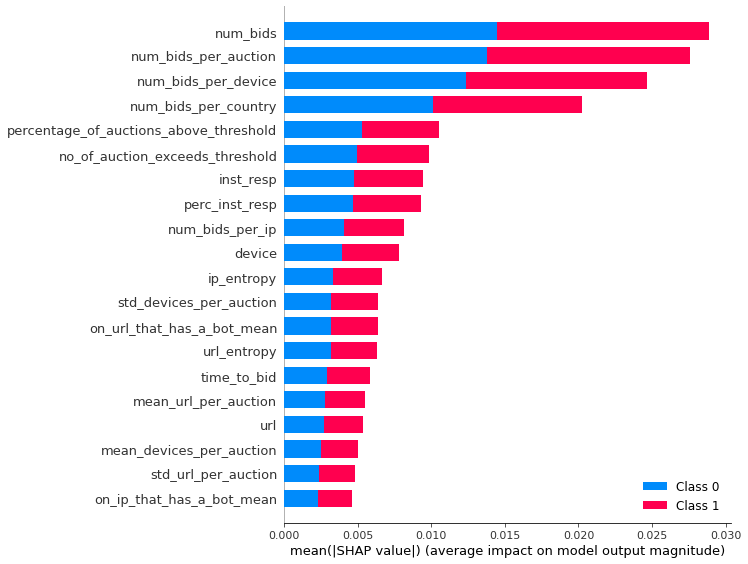

In [36]:
shap_values = shap.TreeExplainer(fmodel1).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")